
# Orthopedic Patient Classification - Decision Trees and Bayesian Classification in Python

---
Autor: David Cardona Duque
---

## Contexto general y tema de estudio

Este proyecto presenta una demostración de cómo se pueden utilizar técnicas de aprendizaje automático, específicamente árboles de decisión y clasificación bayesiana, para clasificar pacientes ortopédicos en dos clases: normal o anormal. El objetivo es explorar cómo estos algoritmos pueden ser utilizados para identificar patrones y relaciones en los datos de pacientes ortopédicos, y cómo estos patrones pueden ser utilizados para predecir la clase a la que pertenece un nuevo paciente.

## Problema o pregunta de estudio y motivación

La clasificación de pacientes ortopédicos es un problema importante en la medicina, ya que puede ayudar a identificar y tratar condiciones médicas importantes. El objetivo de este proyecto es responder a la pregunta: ¿cómo se pueden utilizar técnicas de aprendizaje automático para clasificar pacientes ortopédicos en dos clases (normal o anormal) y cómo pueden estas técnicas ser útiles en la práctica médica?

## Objetivo del informe

El objetivo de este informe es proporcionar una demostración detallada del uso de técnicas de aprendizaje automático en Python para clasificar pacientes ortopédicos en dos clases. En este informe, se describe el conjunto de datos utilizado, se presentan los resultados de los diferentes algoritmos utilizados y se discuten las implicaciones de los resultados. También se proporciona código detallado y comentarios para permitir que otros usuarios reproduzcan los resultados y exploren los datos por sí mismos.



## Lectura inicial librerias

In [66]:
# Cargar librerias
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import plotly.express as px
import imblearn
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import StratifiedKFold

 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedKFold
# librerías Árboles de Decisión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer

## Descripcion base de datos

### Lectura inicial base

In [2]:
#Lectura Base de datos del Imdb
df = pd.read_csv('columnavertebral.csv')
df

,Incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvis,espondilolistesis,tipo_paciente
0,63.03,22.55,39.61,40.48,98.67,-0.25,Anormal
1,39.06,10.06,25.02,"29,00",114.41,4.56,Anormal
2,68.83,22.22,50.09,46.61,105.99,-3.53,Anormal
3,69.3,24.65,44.31,44.64,101.87,11.21,Anormal
4,49.71,9.65,28.32,40.06,108.17,7.92,Anormal
...,...,...,...,...,...,...,...
305,47.9,13.62,"36,00",34.29,117.45,-4.25,Normal
306,53.94,20.72,29.22,33.22,114.37,-0.42,Normal
307,61.45,22.69,46.17,38.75,125.67,-2.71,Normal
308,45.25,8.69,41.58,36.56,118.55,0.21,Normal


### Descripcion de las columnas

In [3]:
df.columns

Index(['Incidencia_pelvica', 'inclinacion_pelvica', 'angulo_lordosis_lumbar',
       'pendiente_sacra', 'radio_pelvis', 'espondilolistesis',
       'tipo_paciente'],
      dtype='object')

Data set que contiene valores para seis características biomecánicas utilizadas para clasificar a los pacientes ortopédicos en 2 clases (normal o anormal).

 Cada paciente está representado en el conjunto de datos por seis atributos biomecánicos derivados de la forma y orientación de la pelvis y la columna lumbar (en este orden): incidencia pélvica, inclinación pélvica, ángulo de lordosis lumbar, pendiente sacra, radio pélvico y grado de espondilolistesis. La siguiente convención se utiliza para las etiquetas de clase: normal 

Segun (Sola, 2021):


*  Indicencia pélvica “pelvic incidence” (Incidencia_pelvica): corresponde a la morfología de la pelvis y por tanto es un parámetro anatómico fijo. Se define como el ángulo entre la línea perpendicular al punto medio del platillo sacro y la línea que va desde ese mismo punto al eje de la cabeza femoral.

* Inclinación pélvica “Pelvic tilt” (inclinacion_pelvica): se define como el ángulo entre la línea que va del punto medio del platillo sacro a la cabeza femoral y la línea vertical trazada desde ese punto. Define la rotación de la pelvis con respecto a la cabeza femoral que consiste en un parámetro compensatorio en pacientes con disbalance positivo.

* Lordosis lumbar “Lumbar lordosis” (angulo_lordosis_lumbar): consiste en el ángulo formado entre el platillo superior de L1 y el platillo sacro.

* Pendiente sacra “Sacral slope” (pendiente_sacra): es el ángulo definido por el platillo sacro y la horizontal.

* Radio pelvico (radio_pelvis): Línea que una el eje bicoxofemoral y el punto pósterosuperior del platillo del sacro

* Espondilolistesis (espondilolistesis): es el desplazamiento de una vértebra hacia delante respecto a la inmediatamente inferior




---
Es claro que la variable objetivo de este dataset sera "tipo_paciente" puesto que es la que indica si el apciente es normal o no dependiendo de las caracteristicas explicadas anteriormente, el problema a solucionar seria predecir si un paciente ortopedico es normal o anormal dependiendo de las 6 caracteristicas biomecanicas anteriores.

## Depuracion de la base de datos

### Depuracion tipos de variables

Se identifica que todas las variables tienen como tipo "object", lo cual en 6 de ellas es incorrecto, pues se refiere a valores numericos, se procedera a cambiar su tipo a "float" pues tienen valores decimales.

A raiz de este cambio se descubrio que todas las variables numericas tienen por lo menos 1 valor decimal escrito con "," en lugar de ".", tambien se procede a cambiar esto al formato correcto.

In [4]:
df.dtypes

Incidencia_pelvica        object
inclinacion_pelvica       object
angulo_lordosis_lumbar    object
pendiente_sacra           object
radio_pelvis              object
espondilolistesis         object
tipo_paciente             object
dtype: object

In [5]:
#Se reemplaza la "," por el "."
df["Incidencia_pelvica"] = df["Incidencia_pelvica"].replace({',':'.'}, regex=True) 
df["inclinacion_pelvica"] = df["inclinacion_pelvica"].replace({',':'.'}, regex=True) 
df["angulo_lordosis_lumbar"] = df["angulo_lordosis_lumbar"].replace({',':'.'}, regex=True) 
df["pendiente_sacra"] = df["pendiente_sacra"].replace({',':'.'}, regex=True)
df["radio_pelvis"] = df["radio_pelvis"].replace({',':'.'}, regex=True) 
df["espondilolistesis"] = df["espondilolistesis"].replace({',':'.'}, regex=True) 

In [6]:
#Se cambian los tipos de las variables y se verifica que esten ahora correctos 
df = df.astype({"Incidencia_pelvica":"float"})
df = df.astype({"inclinacion_pelvica":"float"})
df = df.astype({"angulo_lordosis_lumbar":"float"})
df = df.astype({"pendiente_sacra":"float"})
df = df.astype({"radio_pelvis":"float"})
df = df.astype({"espondilolistesis":"float"})

df.dtypes

Incidencia_pelvica        float64
inclinacion_pelvica       float64
angulo_lordosis_lumbar    float64
pendiente_sacra           float64
radio_pelvis              float64
espondilolistesis         float64
tipo_paciente              object
dtype: object

### Depuracion valores outliers

Se procedaera a identificar por variable numerica mediante distintos analisis, si se presentan valores outliers y que hacer con respecto a estos.




#### Incidencia_pelvica:








* En primer lugar en el boxplot se identifican 3 valores atipicos, aun no se tomaran decisiones pues no se sabe si son razonables. 

* Segun (Le Huec et al., 2011) el valor minimo aproximado de esta variable es de 35 y el maximo aproximado de 85, procederemos a ampliar un poco este rango (30 a 96) debido a que el dataset admite casos anormales de estas condiciones con el objetivo de checkear el tipo de paciente, se procede a comprobar que valores estan por fuera de este rango y se reemplazaran por el promedio para evitar un sobreajuste en el modelo pero no perder el resto de caracteristicas de este registro que pueden ser valiosas. 

In [7]:
fig = px.box(df['Incidencia_pelvica'], y="Incidencia_pelvica")
fig.show()

In [8]:
check_outliers=False
count=0

for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,0]<30 or df.iloc[index,0]>96:
        check_outliers=True
        print(df.iloc[index,0])
        print(df.iloc[index,6])
        count+=1

print(check_outliers)
print(count)

26.15
Anormal
96.66
Anormal
129.83
Anormal
118.14
Anormal
115.92
Anormal
True
5


In [9]:
for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,0]<30 or df.iloc[index,0]>96:
        check_outliers=True
        df.iat[index,0]=round(df['Incidencia_pelvica'].mean(),1)
        


#### inclinacion_pelvica : 

* En el diagrama de cajas se identifican algunos valores atipicos en los datos, se procedera a analizar si estos valores son razonables.

* Segun (Sola, 2021) la inclinacion pelvica varia normalmente entre 5 y 30, teniendo el cuenta el origen del dataset el cual tiene en cuenta datos de tipos de paciente anormales, se considera logico que existan valores fuera de este rango, por esto solo se procederan a cambiar por el promedio los valores muy fuera de este rango (menores a -7 y mayores a 43) con el objetivo de evitar un sobreajuste en el modelo y no desperdiciar datos eliminandolos debido a la baja cantidad de datos disponibles.

In [10]:
fig = px.box(df['inclinacion_pelvica'], y="inclinacion_pelvica")
fig.show()

In [11]:
check_outliers=False
count=0

for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,1]<-7 or df.iloc[index,1]>43:
        check_outliers=True
        print(df.iloc[index,1])
        print(df.iloc[index,6])
        count+=1

print(check_outliers)
print(count)

48.07
Anormal
48.9
Anormal
49.43
Anormal
46.55
Anormal
True
4


In [12]:
for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,1]<-7 or df.iloc[index,1]>43:
        check_outliers=True
        df.iat[index,1]=round(df['inclinacion_pelvica'].mean(),1)

#### angulo_lordosis_lumbar:

* En el diagrama de cajas se observa un paisaje alentador, pues solo se identifica un dato atipico, se llevara a cabo un analisis de si es razonable o no.

* Segun (Sola, 2021) el angulo lordosis lumbal  varia normalmente entre 31 y 79, teniendo el cuenta el origen del dataset el cual tiene en cuenta datos de tipos de paciente anormales, se considera logico que existan valores fuera de este rango, por esto solo se procederan a cambiar por el promedio los valores muy fuera de este rango (menores a 14 y mayores a 101) con el objetivo de evitar un sobreajuste en el modelo y no desperdiciar datos eliminandolos debido a la baja cantidad de datos disponibles.

In [13]:
fig = px.box(df['angulo_lordosis_lumbar'], y="angulo_lordosis_lumbar")
fig.show()

In [14]:
check_outliers=False
count=0

for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,2]<14 or df.iloc[index,2]>101:
        check_outliers=True
        print(df.iloc[index,2])
        print(df.iloc[index,6])
        count+=1

print(check_outliers)
print(count)

125.74
Anormal
True
1


In [15]:
for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,2]<14 or df.iloc[index,2]>101:
        check_outliers=True
        df.iat[index,2]=round(df['angulo_lordosis_lumbar'].mean(),1)

#### pendiente_sacra:

* En el diagrama de cajas se observa un paisaje alentador, pues solo se identifica un dato atipico, se llevara a cabo un analisis de si es razonable o no.

* Segun (Sola, 2021) la pendiente_sacra varia normalmente entre 20 y 65, teniendo el cuenta el origen del dataset el cual tiene en cuenta datos de tipos de paciente anormales, se considera logico que existan valores fuera de este rango, por esto solo se procederan a cambiar por el promedio los valores muy fuera de este rango (menores a 12 y mayores a 80) con el objetivo de evitar un sobreajuste en el modelo y no desperdiciar datos eliminandolos debido a la baja cantidad de datos disponibles.

In [16]:
fig = px.box(df['pendiente_sacra'], y="pendiente_sacra")
fig.show()

In [17]:
check_outliers=False
count=0

for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,3]<12 or df.iloc[index,3]>80:
        check_outliers=True
        print(df.iloc[index,3])
        print(df.iloc[index,6])
        count+=1

print(check_outliers)
print(count)

121.43
Anormal
True
1


In [18]:
for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,3]<12 or df.iloc[index,3]>80:
        check_outliers=True
        df.iat[index,3]=round(df['pendiente_sacra'].mean(),1)

#### radio_pelvis:

* Para esta variable no se pudo encontrar referencias que nos indiquen cual seria el rango aproximado de valores valido, por esto solo se tendra en cuenta el boxplot para tomar decisiones con respecto a los datos atipicos.

* Se establecio un rango de menor de 80 y mayor de 151 debido a que queremos solucionar los valores mas alejados del diagrama para evitar sobreajuste en el modelo, se procedera a cambiarlos por el promedio para no perder el resto de caracteristicas.

In [19]:
fig = px.box(df['radio_pelvis'], y="radio_pelvis")
fig.show()

In [20]:
check_outliers=False
count=0

for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,4]<80 or df.iloc[index,4]>151:
        check_outliers=True
        print(df.iloc[index,4])
        print(df.iloc[index,6])
        count+=1

print(check_outliers)
print(count)

151.84
Anormal
163.07
Anormal
70.08
Anormal
79.0
Anormal
157.85
Anormal
True
5


In [21]:
for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,4]<80 or df.iloc[index,4]>151:
        check_outliers=True
        df.iat[index,4]=round(df['radio_pelvis'].mean(),1)

#### espondilolistesis:

* En primera medida, en el boxplot se observa un dato extremadamente atipico y un conjunto de datos que podrian carcterizarse como atipicos.

* La variable espondilolistesis describe una afeccion por lo cual el valor permitido teoricamente podria ser cualquiera, se procedera a cambiar por el promedio el dato de 418.54 porque aunque posible podria causar un sobreajuste en el modelo. Por el contrario el resto de valores que podrian clasificarse como atipicos se dejaran como tal puesto que pueden aportar informacion util sobre como esta afeccion afecta el tipo de paciente

In [22]:
fig = px.box(df['espondilolistesis'], y="espondilolistesis")
fig.show()

In [23]:
for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if  df.iloc[index,5]>160:
        check_outliers=True
        df.iat[index,5]=round(df['espondilolistesis'].mean(),1)

### Depuracion valores NaN

In [24]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df.isnull().values.any()
print(check_for_nan)

False


No se encuentran valores NaN en el dataset

## Oversampling

Nuestra variable objetivo tiene valores de normal y anormal, procederemos a cambiar normal por 0 y anormal por 1 para un mejor manejo en el modelo.

Se observa un desbalance en los datos, por el cual se procedera a hacer un oversampling con SMOTE para un mejor balanceo.


In [25]:
df2 =df['tipo_paciente']

df.loc[ df2 == "Normal", 'tipo_paciente']	= 0.0
df.loc[ df2 == "Anormal", 'tipo_paciente'] = 1.0


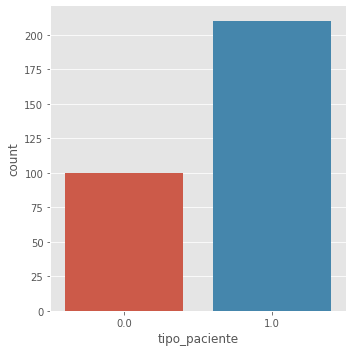

In [26]:
g = sb.catplot(x='tipo_paciente', data=df, kind="count")

In [27]:
# Proceso de oversampling
X=df.drop('tipo_paciente',axis=1) # Crea X, todas variables menos objetivo
y=df['tipo_paciente'] # Crea y, variable objetivo
y=y.astype('float')

oversample = SMOTE(random_state=42)
X_sm,y_sm = oversample.fit_resample(X,y) #crea los datos con oversampling

In [28]:
df = pd.concat([X_sm, y_sm], axis=1) #genera dataset con todos, los datos
df

,Incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvis,espondilolistesis,tipo_paciente
0,63.030000,22.550000,39.610000,40.480000,98.670000,-0.250000,1.0
1,39.060000,10.060000,25.020000,29.000000,114.410000,4.560000,1.0
2,68.830000,22.220000,50.090000,46.610000,105.990000,-3.530000,1.0
3,69.300000,24.650000,44.310000,44.640000,101.870000,11.210000,1.0
4,49.710000,9.650000,28.320000,40.060000,108.170000,7.920000,1.0
...,...,...,...,...,...,...,...
415,54.060665,10.372186,44.096101,43.693836,112.925842,-0.579211,0.0
416,88.459232,26.424004,68.047579,62.043423,111.410477,6.061806,0.0
417,50.615607,17.522313,28.223989,33.093294,120.929438,1.353322,0.0
418,44.488615,-0.544298,56.716880,45.026120,122.822549,-2.410491,0.0


## Encoded de las variables

### Incidencia_pelvica

Se procede a agrupar los valores en cuartiles del 0 al 3 respectivamente para tener un mejor manejo en el modelo, se puede observar que los datos quedan extremandamente balanceados.

* Menor o igual que 45.243847  = 0
* Mayor a 45.243847 y menor o igual que 54.815336 = 1
* Mayor a 54.815336 y menor o igual que 68.872500 = 2
* Mayor a 68.872500 = 3


In [29]:
df['Incidencia_pelvica'].describe()

count    420.000000
mean      57.676249
std       15.560047
min       30.150000
25%       45.243847
50%       54.815336
75%       68.872500
max       95.480000
Name: Incidencia_pelvica, dtype: float64

In [30]:
df_Incidencia_pelvica=df['Incidencia_pelvica']

df.loc[ df_Incidencia_pelvica <= 45.243847, 'Incidencia_pelvica']	= 0
df.loc[( df_Incidencia_pelvica> 45.243847) & (df_Incidencia_pelvica <= 54.815336), 'Incidencia_pelvica'] = 1
df.loc[(df_Incidencia_pelvica > 54.815336) & (df_Incidencia_pelvica <=  68.872500), 'Incidencia_pelvica'] = 2
df.loc[ df_Incidencia_pelvica >  68.872500, 'Incidencia_pelvica'] = 3



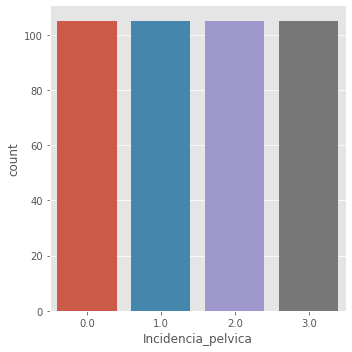

In [31]:
g = sb.catplot(x='Incidencia_pelvica', data=df, kind="count")

### inclinacion_pelvica

Se procede a agrupar los valores en cuartiles del 0 al 3 respectivamente para tener un mejor manejo en el modelo, se puede observar que los datos quedan extremandamente balanceados.

* Menor o igual que 9.825000  = 0
* Mayor a 9.825000 y menor o igual que 15.290000 = 1
* Mayor a 15.290000 y menor o igual que 20.940000 = 2
* Mayor a 20.940000 = 3

In [32]:
df['inclinacion_pelvica'].describe()

count    420.000000
mean      16.137842
std        8.951824
min       -6.550000
25%        9.825000
50%       15.290000
75%       20.940000
max       42.690000
Name: inclinacion_pelvica, dtype: float64

In [33]:
df2 =df['inclinacion_pelvica']

df.loc[ df2 <= 9.825000, 'inclinacion_pelvica']	= 0
df.loc[( df2> 9.825000) & (df2 <= 15.290000), 'inclinacion_pelvica'] = 1
df.loc[(df2 > 15.290000) & (df2 <= 20.940000), 'inclinacion_pelvica'] = 2
df.loc[ df2 > 20.940000, 'inclinacion_pelvica'] = 3

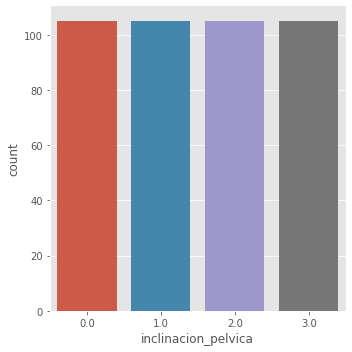

In [34]:
g = sb.catplot(x='inclinacion_pelvica', data=df, kind="count")

### angulo_lordosis_lumbar

Se procede a agrupar los valores en cuartiles del 0 al 3 respectivamente para tener un mejor manejo en el modelo, se puede observar que los datos quedan extremandamente balanceados.

* Menor o igual que 36.000000  = 0
* Mayor a 36.000000 y menor o igual que 46.898636 = 1
* Mayor a 46.898636 y menor o igual que 60.035000 = 2
* Mayor a 60.035000 = 3

In [35]:
df['angulo_lordosis_lumbar'].describe()

count    420.000000
mean      49.201719
std       17.227157
min       14.000000
25%       36.000000
50%       46.898636
75%       60.035000
max      100.740000
Name: angulo_lordosis_lumbar, dtype: float64

In [36]:
df2 =df['angulo_lordosis_lumbar']

df.loc[ df2 <= 36.000000, 'angulo_lordosis_lumbar']	= 0
df.loc[( df2> 36.000000) & (df2 <= 46.898636), 'angulo_lordosis_lumbar'] = 1
df.loc[(df2 > 46.898636) & (df2 <= 60.035000), 'angulo_lordosis_lumbar'] = 2
df.loc[ df2 > 60.035000, 'angulo_lordosis_lumbar'] = 3

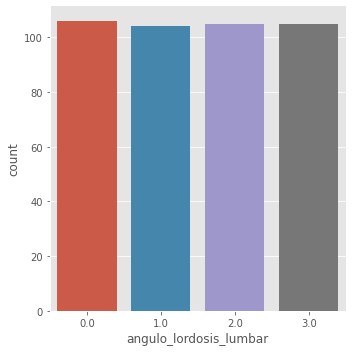

In [37]:
g = sb.catplot(x='angulo_lordosis_lumbar', data=df, kind="count")

### pendiente_sacra

Se procede a agrupar los valores en cuartiles del 0 al 3 respectivamente para tener un mejor manejo en el modelo, se puede observar que los datos quedan extremandamente balanceados.

* Menor o igual que 32.980462  = 0
* Mayor a 32.980462 y menor o igual que 40.610943 = 1
* Mayor a 40.610943 y menor o igual que 49.981323 = 2
* Mayor a 49.981323 = 3

In [38]:
df['pendiente_sacra'].describe()

count    420.000000
mean      41.497562
std       11.964464
min       13.370000
25%       32.980462
50%       40.610943
75%       49.981323
max       79.700000
Name: pendiente_sacra, dtype: float64

In [39]:
df2 =df['pendiente_sacra']

df.loc[ df2 <= 32.980462, 'pendiente_sacra']	= 0
df.loc[( df2> 32.980462) & (df2 <= 40.610943), 'pendiente_sacra'] = 1
df.loc[(df2 > 40.610943) & (df2 <= 49.981323), 'pendiente_sacra'] = 2
df.loc[ df2 > 49.981323, 'pendiente_sacra'] = 3

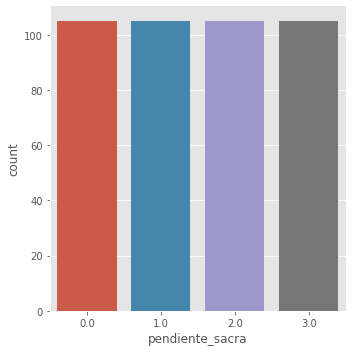

In [40]:
g = sb.catplot(x='pendiente_sacra', data=df, kind="count")

### radio_pelvis

Se procede a agrupar los valores en cuartiles del 0 al 3 respectivamente para tener un mejor manejo en el modelo, se puede observar que los datos quedan extremandamente balanceados.

* Menor o igual que 113.018961  = 0
* Mayor a 113.018961 y menor o igual que 119.205861 = 1
* Mayor a 119.205861 y menor o igual que 126.446462 = 2
* Mayor a 126.446462 = 3

In [41]:
df['radio_pelvis'].describe()

count    420.000000
mean     118.952431
std       11.299474
min       81.020000
25%      113.018961
50%      119.205861
75%      126.446462
max      148.530000
Name: radio_pelvis, dtype: float64

In [42]:
df2 =df['radio_pelvis']

df.loc[ df2 <= 113.018961, 'radio_pelvis']	= 0
df.loc[( df2> 113.018961) & (df2 <= 119.205861), 'radio_pelvis'] = 1
df.loc[(df2 > 119.205861) & (df2 <= 126.446462), 'radio_pelvis'] = 2
df.loc[ df2 > 126.446462, 'radio_pelvis'] = 3

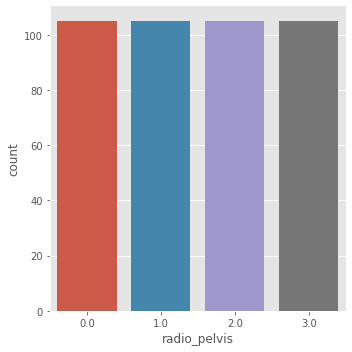

In [43]:
g = sb.catplot(x='radio_pelvis', data=df, kind="count")

### espondilolistesis

Se procede a agrupar los valores en cuartiles del 0 al 3 respectivamente para tener un mejor manejo en el modelo, se puede observar que los datos quedan extremandamente balanceados.

* Menor o igual que 1.600000  = 0
* Mayor a 1.600000 y menor o igual que 11.765000 = 1
* Mayor a 11.765000 y menor o igual que 40.787500 = 2
* Mayor a 40.787500 = 3

In [44]:
df['espondilolistesis'].describe()

count    420.000000
mean      18.900293
std       27.956615
min      -11.060000
25%        0.387138
50%        5.301012
75%       31.772500
max      148.750000
Name: espondilolistesis, dtype: float64

In [45]:
df2 =df['espondilolistesis']

df.loc[ df2 <= 0.387138, 'espondilolistesis']	= 0
df.loc[( df2> 0.387138) & (df2 <= 5.301012), 'espondilolistesis'] = 1
df.loc[(df2 > 5.301012) & (df2 <= 31.772500), 'espondilolistesis'] = 2
df.loc[ df2 > 31.772500, 'espondilolistesis'] = 3

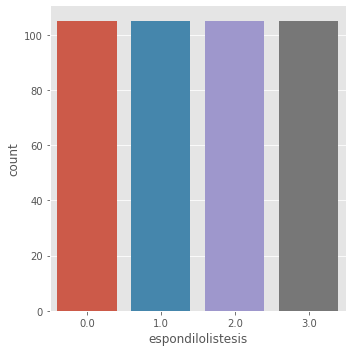

In [46]:
g = sb.catplot(x='espondilolistesis', data=df, kind="count")

## Distribucion de la variable objetivo

Se puede observar que luego del oversampling realizado la variable objetivo esta balanceada, en la seccion posterior se procedera a analizar como se comporta con respecto al resto de variables.

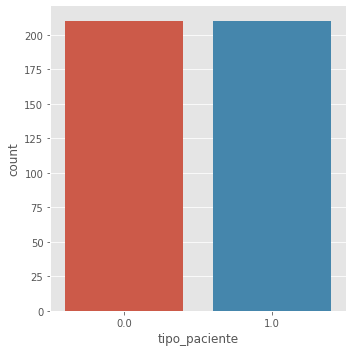

In [47]:
g = sb.catplot(x='tipo_paciente', data=df, kind="count")

In [48]:
anormal=0
normal=0

for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,6]==1:
        anormal+=1

    else:
      normal+=1

print('Anormal:'+str(anormal))
print('Normal:'+str(normal))



Anormal:210
Normal:210


## Análisis exploratorio de Variable Objetivo vs Atributos depurados.

Se procedera a analizar variable por variable como se comportan con la variable objetivo y a hacer un breve analisis sobre esto.

### tipo_paciente VS Incidencia_pelvica 

Text(0.5, 0.98, 'tipo_paciente VS Incidencia_pelvica')

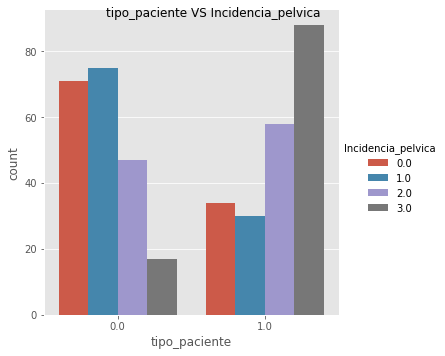

In [49]:
g = sb.catplot(x='tipo_paciente', data=df, hue='Incidencia_pelvica', kind="count")

g.fig.suptitle("tipo_paciente VS Incidencia_pelvica")

* Se puede observar que los pacientes con mayor incidencia pelvica (grupo 3) son en la mayoria de los casos pacientes de tipo anormal, ademas que los pacientes del grupo 1, los cuales tienen una incidencia pelvica un poco mas moderada son los que mas se clasifican como pacientes del tipo normal

### tipo_paciente VS inclinacion_pelvica
 

Text(0.5, 0.98, 'tipo_paciente VS inclinacion_pelvica')

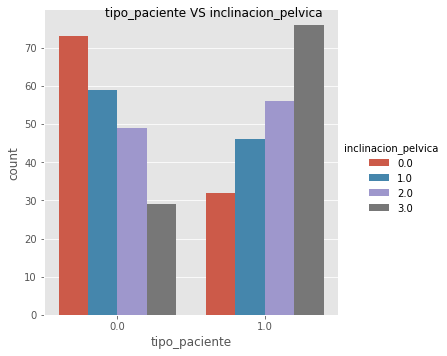

In [50]:
g = sb.catplot(x='tipo_paciente', data=df, hue='inclinacion_pelvica', kind="count")

g.fig.suptitle("tipo_paciente VS inclinacion_pelvica")

* Podemos observar que los pacientes del grupo 3, los cuales tienen la mayor inclinacion pelvica son los que mas se clasifican como pacientes de tipo anormal, ademas que si a medida de que aumenta la inclinacion pelvica hay mas datos de anormalidad que normalidad en cada grupo y a diferencia de la primera variable analizada quienes tienen menor inclinacion pelvica (grupo 0) si son los que mas se han clasificado como normales

### tipo_paciente VS angulo_lordosis_lumbar 





Text(0.5, 0.98, 'tipo_paciente VS angulo_lordosis_lumbar')

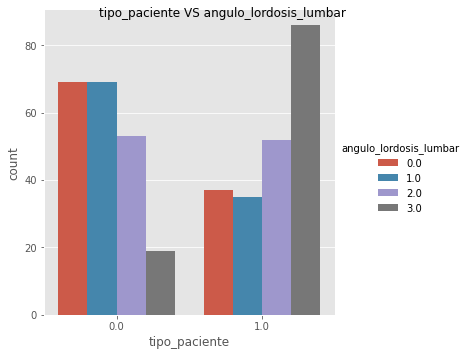

In [51]:
g = sb.catplot(x='tipo_paciente', data=df, hue='angulo_lordosis_lumbar', kind="count")

g.fig.suptitle("tipo_paciente VS angulo_lordosis_lumbar")

* Se puede apreciar que existe una tendencia a que si tienes un angulo lordosis lumbar alto seas clasificado como paciente anormal, aunque es de destacar que la cantidad de pacientes normales que pertenecen al grupo 0 y grupo 1 es igual, esto nos puede indicar que un valor bajo o medio tiene tendencia a clasifcar al paciente como normal, por ultimo, es de destacar que el grupo 2 tiene una cantidad de pacientes casi identica clasificados como normal y anormal, lo cual nos indica que si se tiene un angulo en ese rango de valores no existe mayor tendencia de clasificacion

### tipo_paciente VS pendiente_sacra





Text(0.5, 0.98, 'tipo_paciente VS pendiente_sacra')

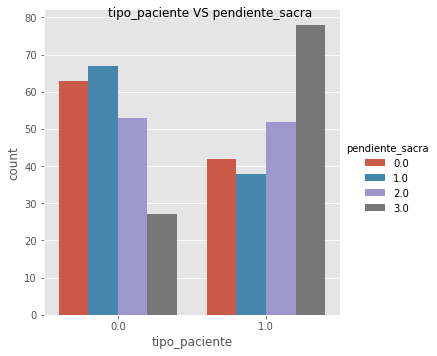

In [52]:
g = sb.catplot(x='tipo_paciente', data=df, hue='pendiente_sacra', kind="count")

g.fig.suptitle("tipo_paciente VS pendiente_sacra")

* De nuevo podemos observar que el grupo 3 es el que mayor numero de clasificados como anormales tiene, pero lo interesante es que el grupo 1, el cual tiene una pendiente sacra moderada es el que mayor clasificados como normales tiene, lo cual significa que una pendiente sacra baja (grupo 0) tiene una mayor tendencia a ser anormal que el grupo 1, por lo cual una pendiente sacara moderada es mejor que una baja si se quiere ser un paciente de tipo normal

### tipo_paciente VS radio_pelvis

Text(0.5, 0.98, 'tipo_paciente VS radio_pelvis')

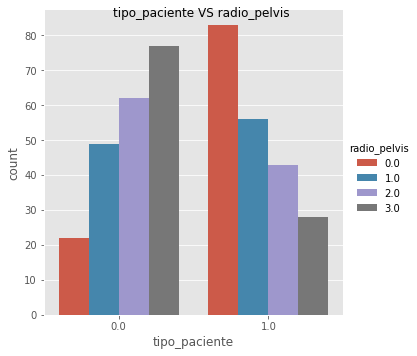

In [53]:
g = sb.catplot(x='tipo_paciente', data=df, hue='radio_pelvis', kind="count")

g.fig.suptitle("tipo_paciente VS radio_pelvis")

* De manera contraria a lo visto anteriormente el grafico nos indica que existe una tendencia a si se tiene menor radio pelvico ser un paciente de tipo anormal, siendo el grupo 3 quien tiene menos pacientes en anormal y mas en normal, por otro lado, el resto de grupos confirman esta hipotesis.

### tipo_paciente VS espondilolistesis

Text(0.5, 0.98, 'tipo_paciente VS espondilolistesis')

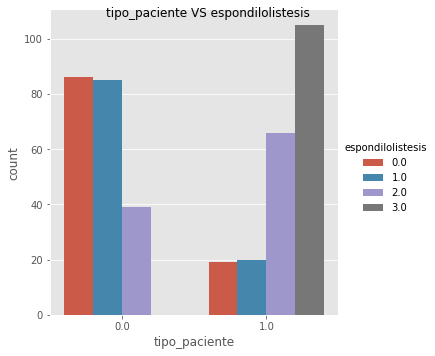

In [54]:
g = sb.catplot(x='tipo_paciente', data=df, hue='espondilolistesis', kind="count")

g.fig.suptitle("tipo_paciente VS espondilolistesis")

* Teniendo en cuenta que la variable espondilolistesis representa una afeccion medica, es normal el comportamiento presentado, donde quien tiene un alto valor, siendo el grupo 3 al que pertenecen los mas altos, es mas probable que sea clasificado como paciente anormal, una ultima cosa para destacar es que nadie con un alto valor de espondilolistesis (refiriendonos al grupo 3) esta clasificado como normal.

## Escogencia del nodo raiz


### Pearson

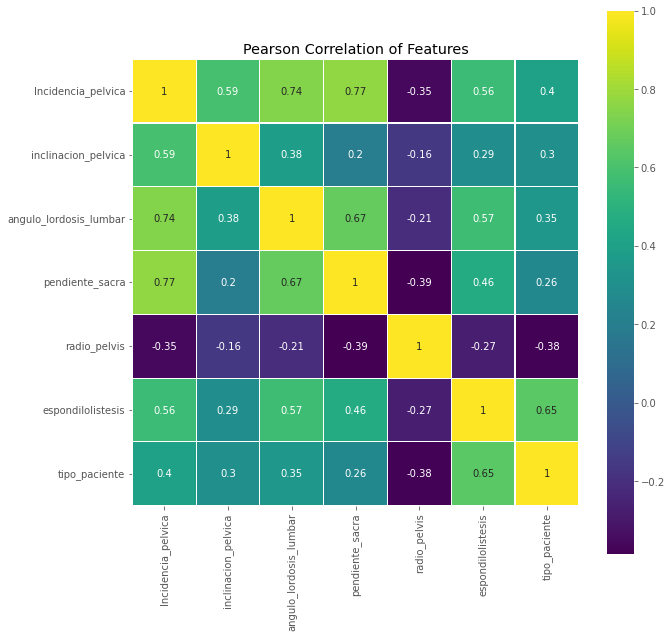

In [55]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features')
sb.heatmap(df.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

### Kramer

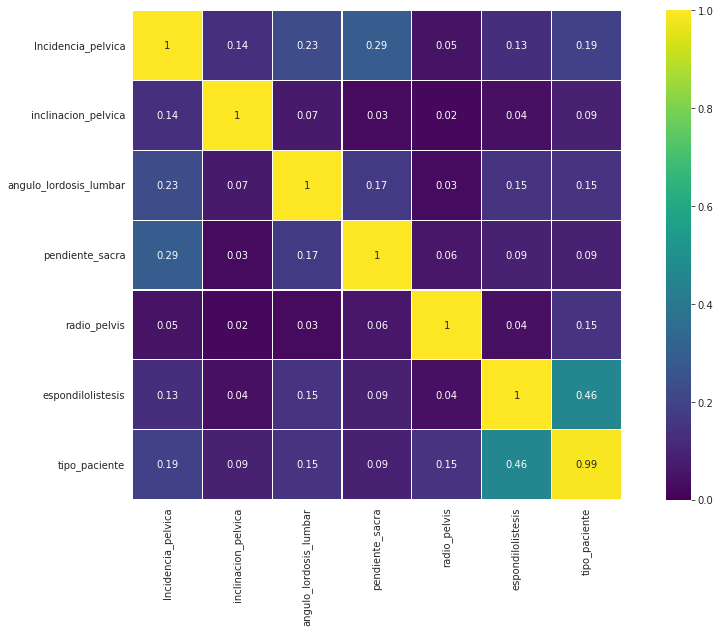

In [56]:
data_encoded = df.copy()
from scipy.stats import chi2_contingency

def cramers_V(var1, var2):
  crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape) - 1
  return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2])
    col.append(round(cramers,2))
  rows.append(col)
  
cramers_results = np.array(rows)
df2 = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
with sb.axes_style("white"):
  ax = sb.heatmap(df2,
                  vmin=0.,
                  vmax=1,
                  cmap=colormap,
                  annot=True,
                  linewidths=0.1,
                  square=True)

plt.show()

### K-best

In [57]:
#Todos los datos excepto la caracteristica objetivo.
X = df.drop(['tipo_paciente'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = df['tipo_paciente']

best=SelectKBest(k=1)    #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['espondilolistesis'], dtype='object')


Ambas matrices nos indican que la varibale 'espondilolistesis' es la mejor candidata a ser el nodo raiz pues es la que mejor correlacion tiene con la variable objetivo ('tipo de paciente') y menos tiene con el resto de variables, para confirmar esto corremos un selectKBest con k=1 y nos da el mismo resultado, por esto escogeremos como nodo raiz para nuestro problema a la variable 'espondilolistesis'

## Seleccion de entropia o gini

### Entropia

In [ ]:
#Característica objetivo: tipo_paciente

#Mezclar datos
df=df.sample(frac=1).reset_index(drop=True)

#Todos los datos excepto la caracteristica tipo_paciente
X = df.drop(['tipo_paciente'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = df['tipo_paciente'] 


X = np.array(X)
y = np.array(y)

In [ ]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1) 
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced') 
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
result = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
result = result[["Max Depth", "Average Accuracy"]]
print(result.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.757143
         2          0.814286
         3          0.840476
         4          0.809524
         5          0.854762
         6          0.847619
         7          0.852381


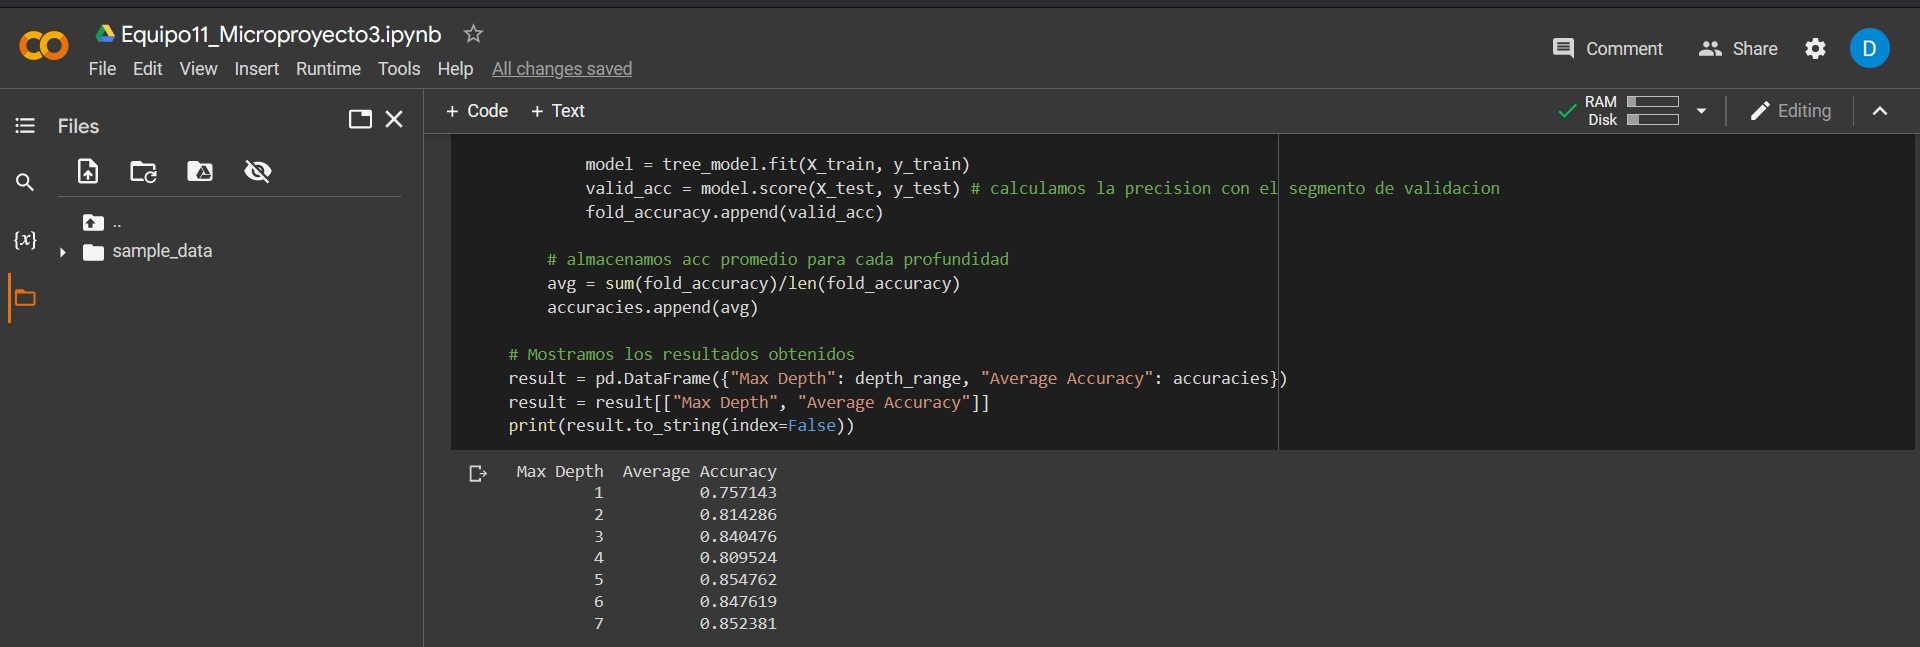

### Gini

In [ ]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1) 
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced') 
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
result = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
result = result[["Max Depth", "Average Accuracy"]]
print(result.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.814286
         2          0.814286
         3          0.826190
         4          0.828571
         5          0.847619
         6          0.850000
         7          0.850000


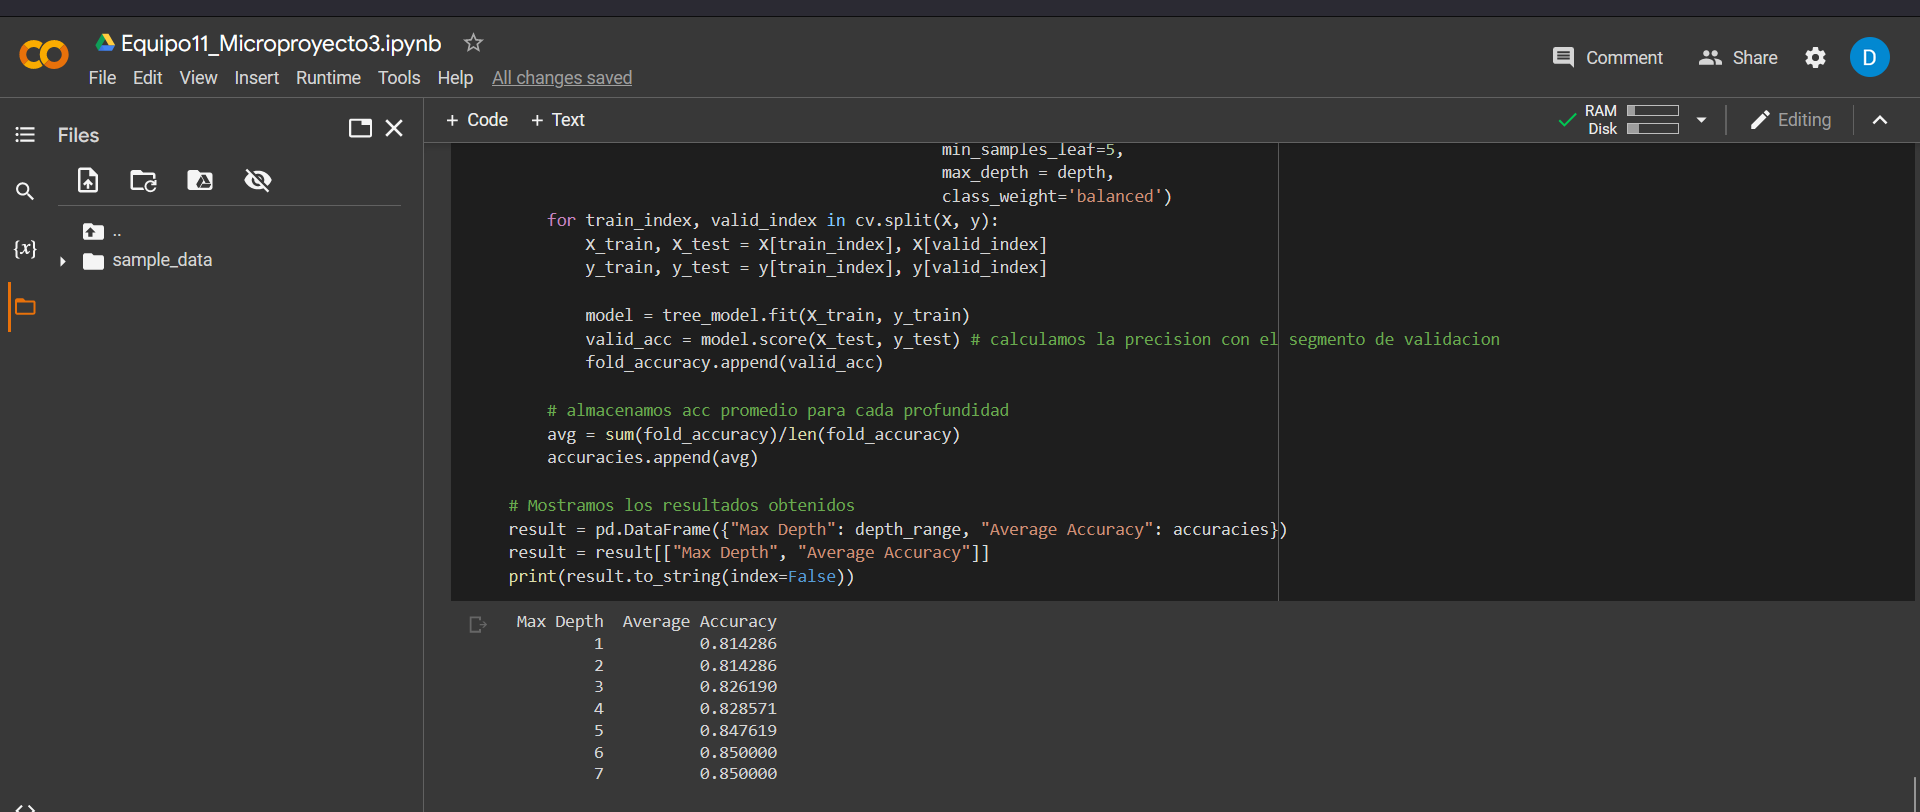

La mejor medida la tiene la entropia ya que en la profundidad 5 nos da una 'accuracy' de  0.854762, la cual es mayor a cualquiera presentada por el arbol que usa Gini, por lo tanto utilizaremos entropia para nuestro modelo.

## Porcentaje de datos de entrenamiento y prueba

* Usaremos un ciclo for para iterar el valor del tamaño de nuestros datos de prueba, de 10% al 40%.

In [ ]:
train=[]
test=[]
test_size=[0.1,0.2,0.3,0.4]
for i in range(1,5,1):
  #Todos los datos excepto la caracteristica comprar
  X = df.drop(['tipo_paciente'], axis=1)

  #Atributo OBJETIVO
  y = df['tipo_paciente'] 

  # Dividimos los datos para entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = (i/10), #90% datos de entrenamiento, 10% prueba
                                                    stratify = y,
                                                    random_state = 1)
  # Datos de entrenaminto
  conteo = X_train.copy()
  conteo['label'] = y_train
  conteo.groupby('label').size()




  decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = 7,
                                             class_weight='balanced') 

  # Ajustamos el modelo con los datos
  decision_tree.fit(X_train, y_train)
  y_pred_train = decision_tree.predict(X_train)

  #Porcentaje de Exactitud con los datos de entrenamiento
  acc_train = accuracy_score(y_train, y_pred_train)
  train.append(acc_train)
  #print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

  y_pred_test = decision_tree.predict(X_test)

  #Porcentaje de Exactitud con pruebas
  acc_test = accuracy_score(y_test, y_pred_test)
  test.append(acc_test)
  #print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))
  
# Mostramos los resultados obtenidos
df2 = pd.DataFrame({"Train accuracy": train, "Test Accuracy": test, "Test size":test_size})
df2 = df2[["Train accuracy", "Test Accuracy",'Test size']]
print(df2.to_string(index=False))

 Train accuracy  Test Accuracy  Test size
       0.873016       0.785714        0.1
       0.877976       0.821429        0.2
       0.884354       0.777778        0.3
       0.873016       0.797619        0.4


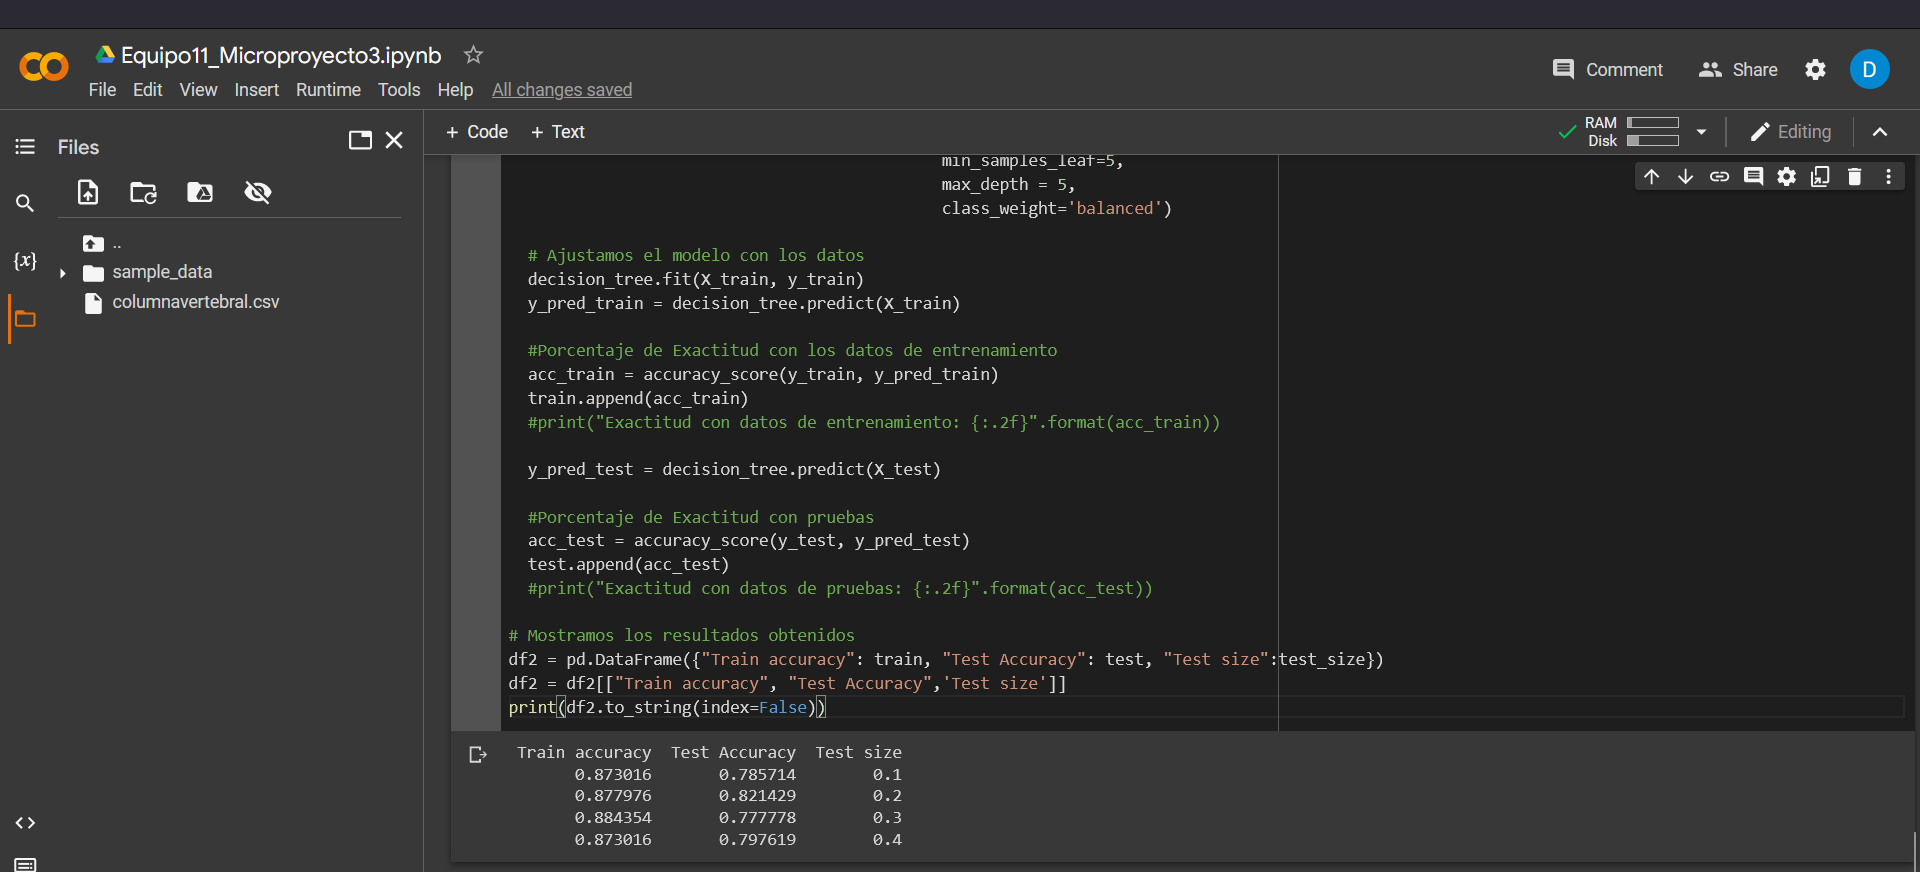

Podemos observar buenos resultados en general, pero el mas alentador es el de un tamaño para prueba del 20% de los datos, con una diferencia entre la 'accuracy' con datos de entrenamiento y la 'accuracy' con datos de prueba del 5% aproximadamente, lo cual es claramente menor al 10% y el menor de la lista, por lo cual este sera el tamaño que usaremos para nuestros datos de prueba y por consiguiente 80% para los datos de entrenamiento.

## Variables a utilizar para el modelo

### Pearson

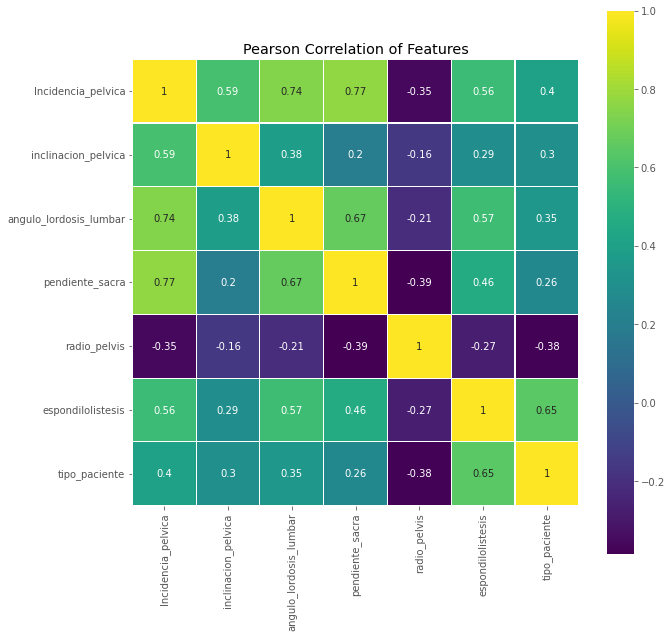

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features')
sb.heatmap(df.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

### Kramer

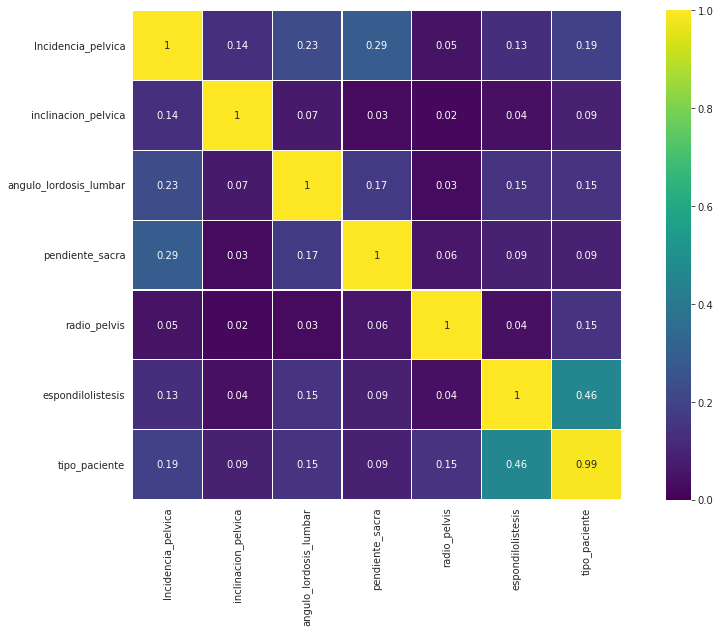

In [ ]:
data_encoded = df.copy()
from scipy.stats import chi2_contingency

def cramers_V(var1, var2):
  crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape) - 1
  return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2])
    col.append(round(cramers,2))
  rows.append(col)
  
cramers_results = np.array(rows)
df2 = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
with sb.axes_style("white"):
  ax = sb.heatmap(df2,
                  vmin=0.,
                  vmax=1,
                  cmap=colormap,
                  annot=True,
                  linewidths=0.1,
                  square=True)

plt.show()

### K-best

In [ ]:
#Todos los datos excepto la caracteristica objetivo.
X = df.drop(['tipo_paciente'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = df['tipo_paciente']

best=SelectKBest(k=len(list(df))-1)    #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Incidencia_pelvica', 'inclinacion_pelvica', 'angulo_lordosis_lumbar',
       'pendiente_sacra', 'radio_pelvis', 'espondilolistesis'],
      dtype='object')


### Numero de variables = 2

In [ ]:
#Todos los datos excepto la caracteristica objetivo.
X = df.drop(['tipo_paciente'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = df['tipo_paciente']

best=SelectKBest(k=2)    #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Incidencia_pelvica', 'espondilolistesis'], dtype='object')


In [ ]:
#Todos los datos excepto la caracteristica comprar # elimino las que no sean las que estan en kbest
X = df.drop(['inclinacion_pelvica','angulo_lordosis_lumbar','pendiente_sacra','tipo_paciente','radio_pelvis'], axis=1)

#Atributo OBJETIVO
y = df['tipo_paciente'] 

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

label
0.0    168
1.0    168
dtype: int64

In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = 7,
                                             class_weight='balanced') 

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.82
Exactitud con datos de pruebas: 0.82


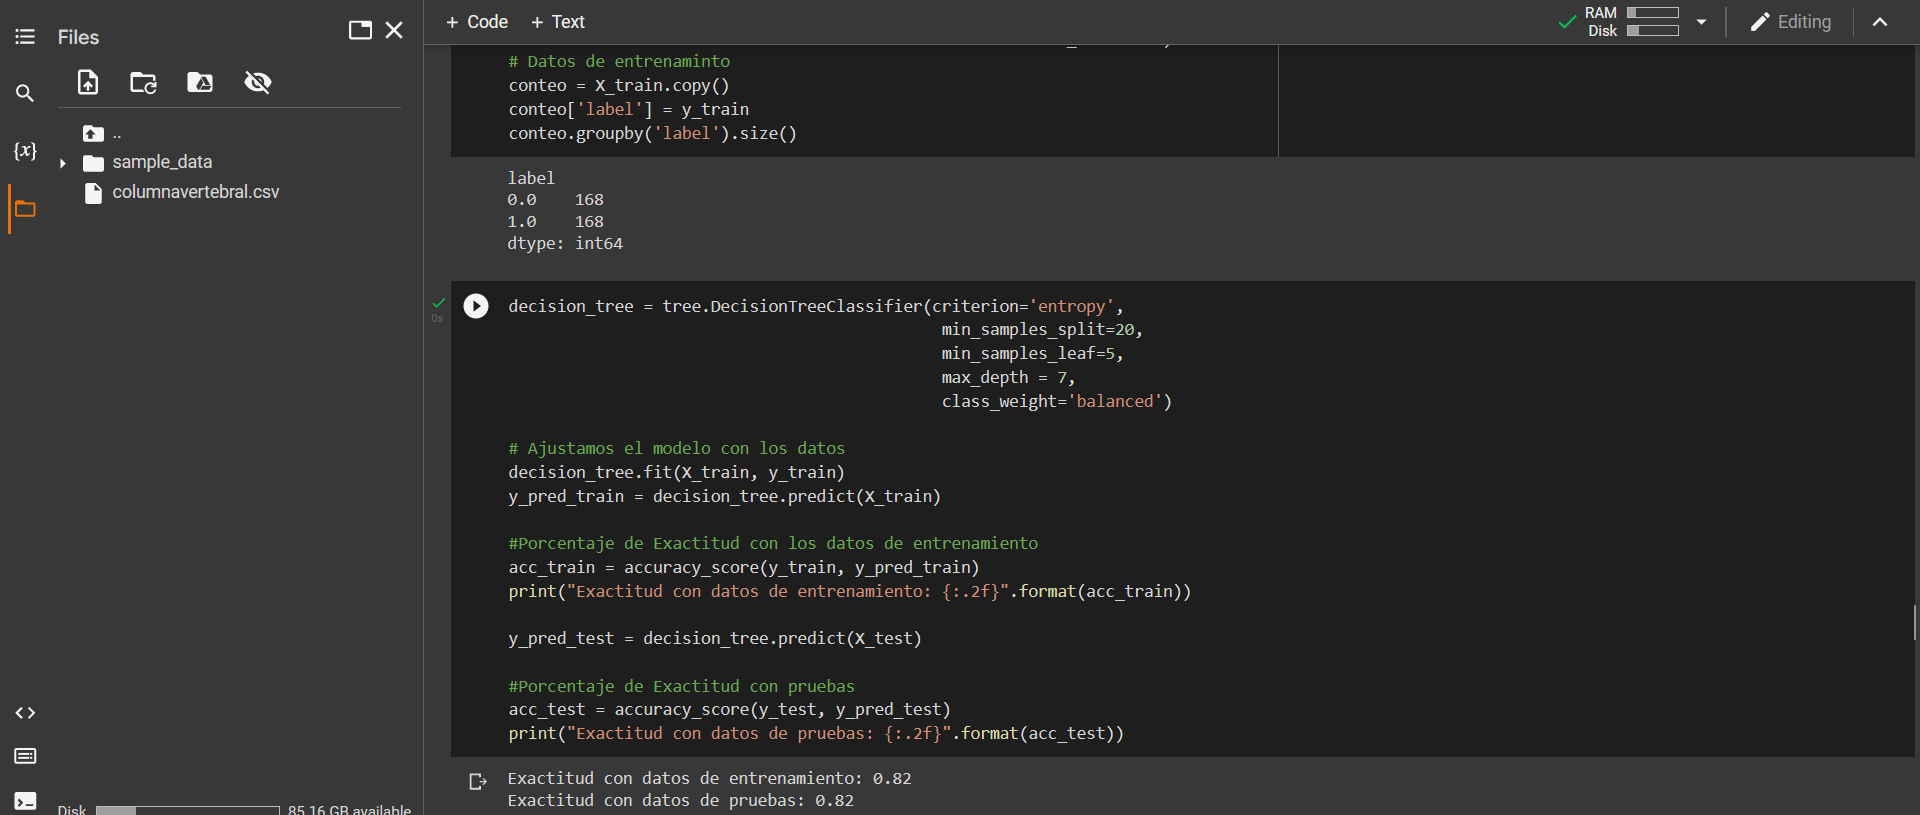

### Numero de variables = 3

In [ ]:
#Todos los datos excepto la caracteristica objetivo.
X = df.drop(['tipo_paciente'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = df['tipo_paciente']

best=SelectKBest(k=3)    #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Incidencia_pelvica', 'radio_pelvis', 'espondilolistesis'], dtype='object')


In [ ]:
#Cuales atributos no están en la lista anterior
df.columns

Index(['Incidencia_pelvica', 'inclinacion_pelvica', 'angulo_lordosis_lumbar',
       'pendiente_sacra', 'radio_pelvis', 'espondilolistesis',
       'tipo_paciente'],
      dtype='object')

In [ ]:
#Todos los datos excepto la caracteristica comprar # elimino las que no sean las que estan en kbest
X = df.drop(['inclinacion_pelvica','angulo_lordosis_lumbar','pendiente_sacra','tipo_paciente'], axis=1)

#Atributo OBJETIVO
y = df['tipo_paciente'] 

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

label
0.0    168
1.0    168
dtype: int64

In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = 7,
                                             class_weight='balanced') 

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.85
Exactitud con datos de pruebas: 0.82


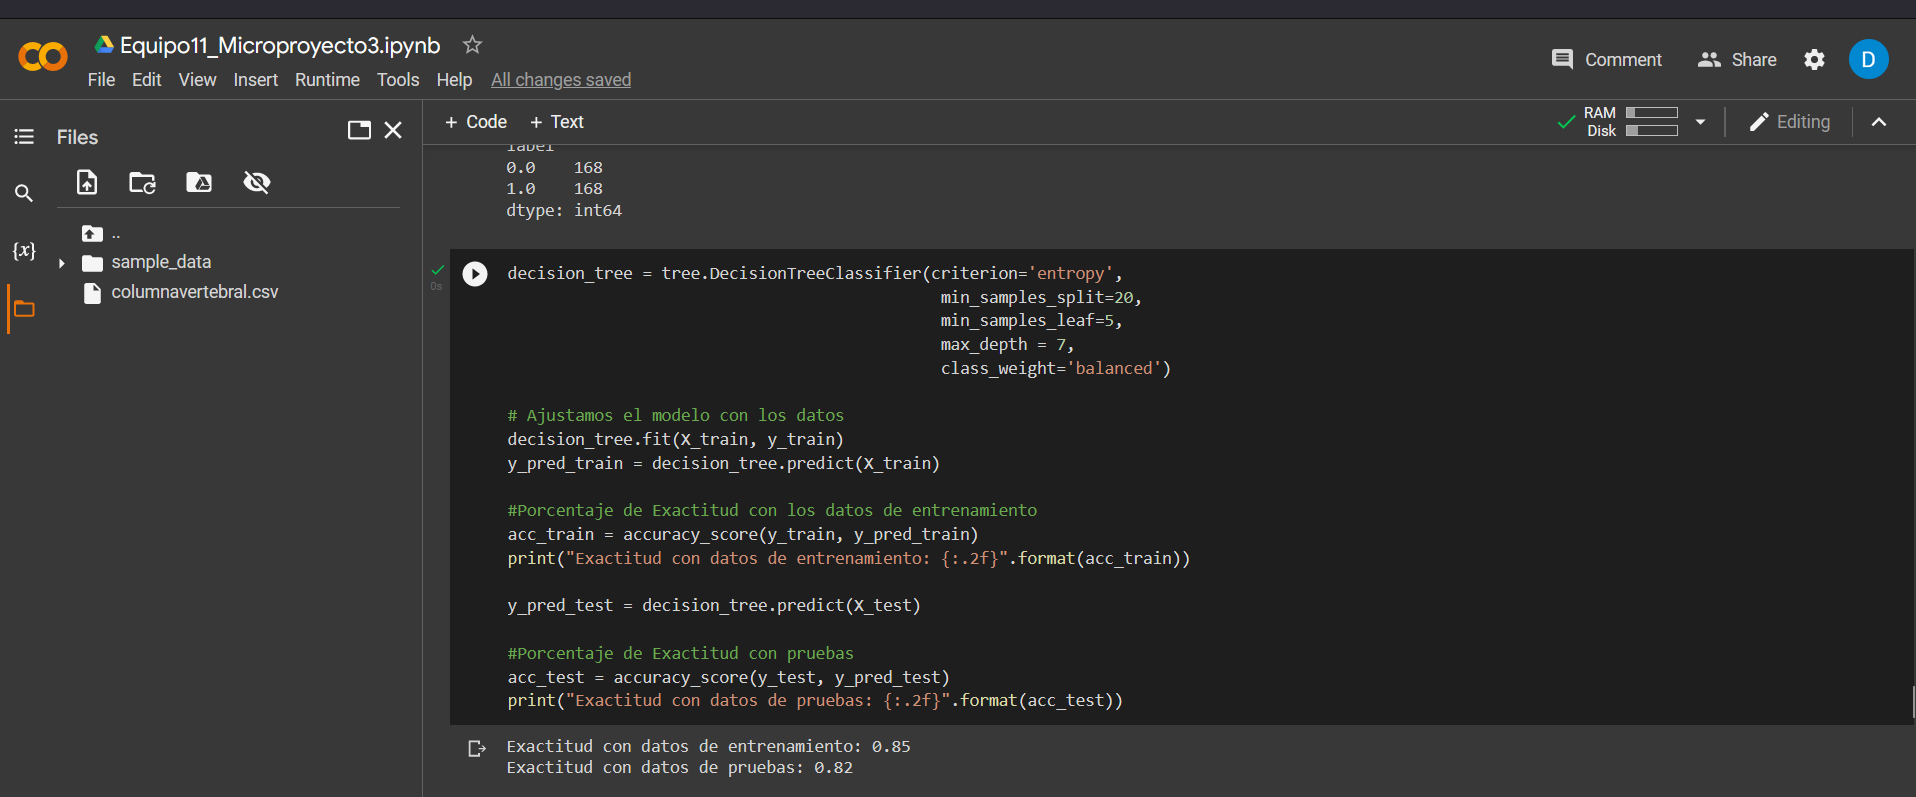

### Numero de variables = 4

In [ ]:
#Todos los datos excepto la caracteristica objetivo.
X = df.drop(['tipo_paciente'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = df['tipo_paciente']

best=SelectKBest(k=4)    #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Incidencia_pelvica', 'angulo_lordosis_lumbar', 'radio_pelvis',
       'espondilolistesis'],
      dtype='object')


In [ ]:
#Cuales atributos no están en la lista anterior
df.columns

Index(['Incidencia_pelvica', 'inclinacion_pelvica', 'angulo_lordosis_lumbar',
       'pendiente_sacra', 'radio_pelvis', 'espondilolistesis',
       'tipo_paciente'],
      dtype='object')

In [ ]:
#Todos los datos excepto la caracteristica comprar # elimino las que no sean las que estan en kbest
X = df.drop(['inclinacion_pelvica','pendiente_sacra','tipo_paciente'], axis=1)

#Atributo OBJETIVO
y = df['tipo_paciente'] 

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

label
0.0    168
1.0    168
dtype: int64

In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = 7,
                                             class_weight='balanced') 

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.86
Exactitud con datos de pruebas: 0.80


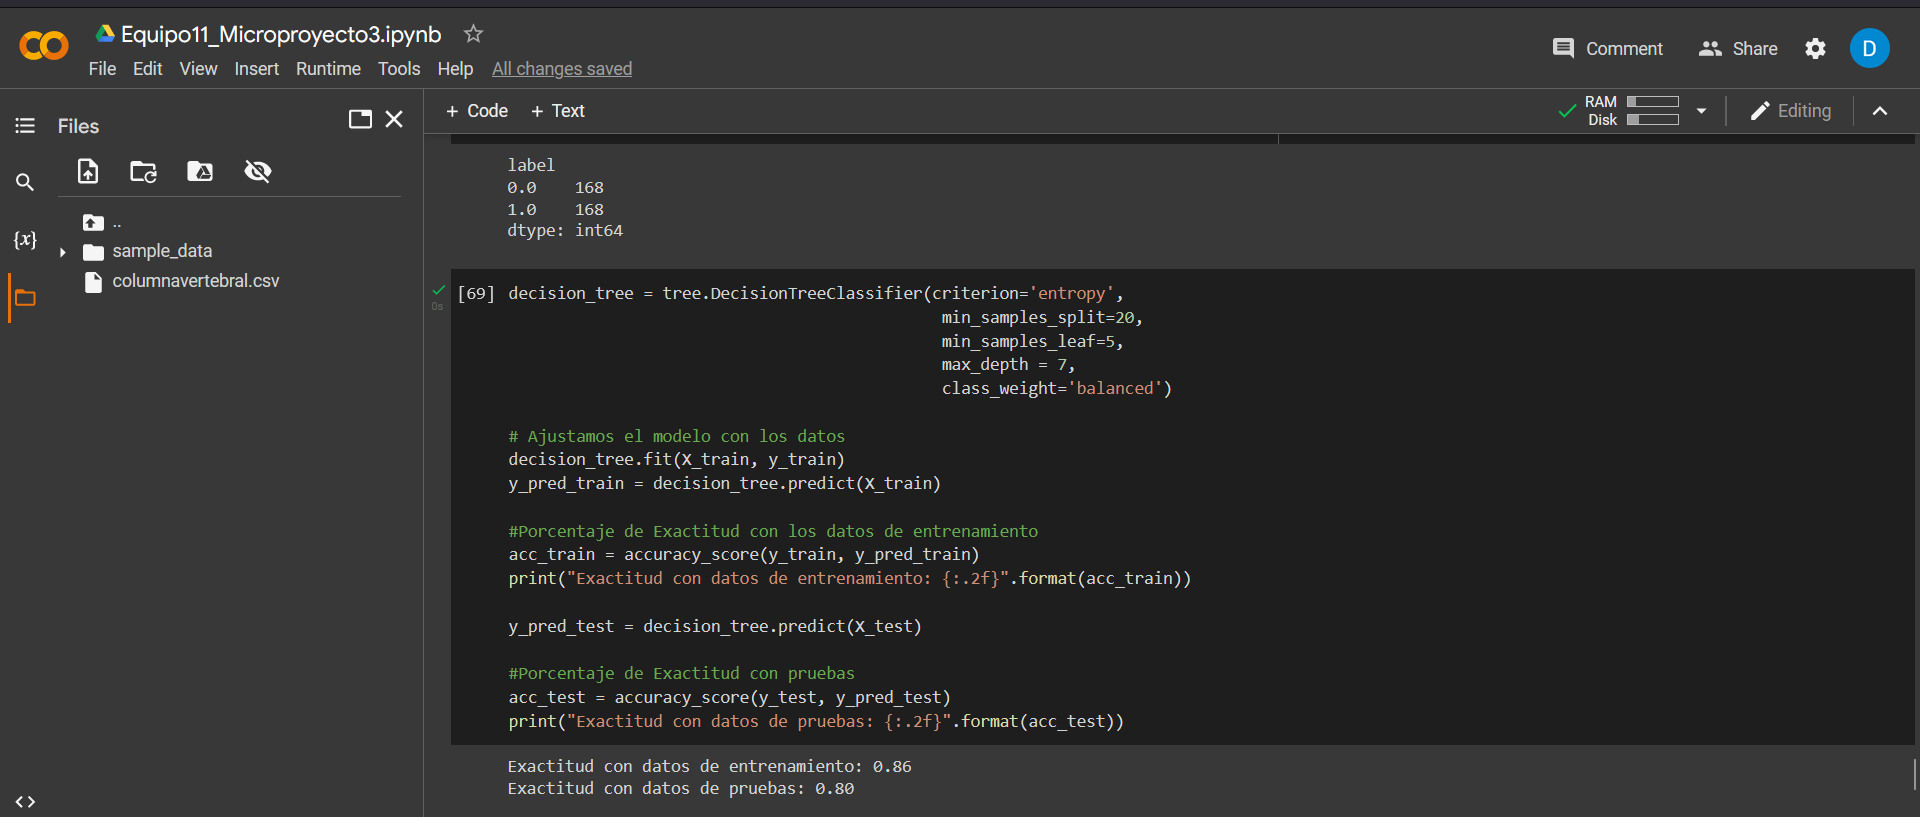

### Numero de variables = 5

In [ ]:
#Todos los datos excepto la caracteristica objetivo.
X = df.drop(['tipo_paciente'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = df['tipo_paciente']

best=SelectKBest(k=5)    #len(list(dataframe))-1: Máximo numero de atributos
                          #Para que el modelo no sea pesado, por el número de filas, deseo un número n=5, podrían ser más, hasta 12

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Incidencia_pelvica', 'inclinacion_pelvica', 'angulo_lordosis_lumbar',
       'radio_pelvis', 'espondilolistesis'],
      dtype='object')


In [ ]:
#Cuales atributos no están en la lista anterior
df.columns

Index(['Incidencia_pelvica', 'inclinacion_pelvica', 'angulo_lordosis_lumbar',
       'pendiente_sacra', 'radio_pelvis', 'espondilolistesis',
       'tipo_paciente'],
      dtype='object')

In [ ]:
#Todos los datos excepto la caracteristica comprar # elimino las que no sean las que estan en kbest
X = df.drop(['pendiente_sacra','tipo_paciente'], axis=1)

#Atributo OBJETIVO
y = df['tipo_paciente'] 

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% prueba
                                                    stratify = y,
                                                    random_state = 1)
# Datos de entrenaminto
conteo = X_train.copy()
conteo['label'] = y_train
conteo.groupby('label').size()

label
0.0    168
1.0    168
dtype: int64

In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = 7,
                                             class_weight='balanced') 

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.87
Exactitud con datos de pruebas: 0.83


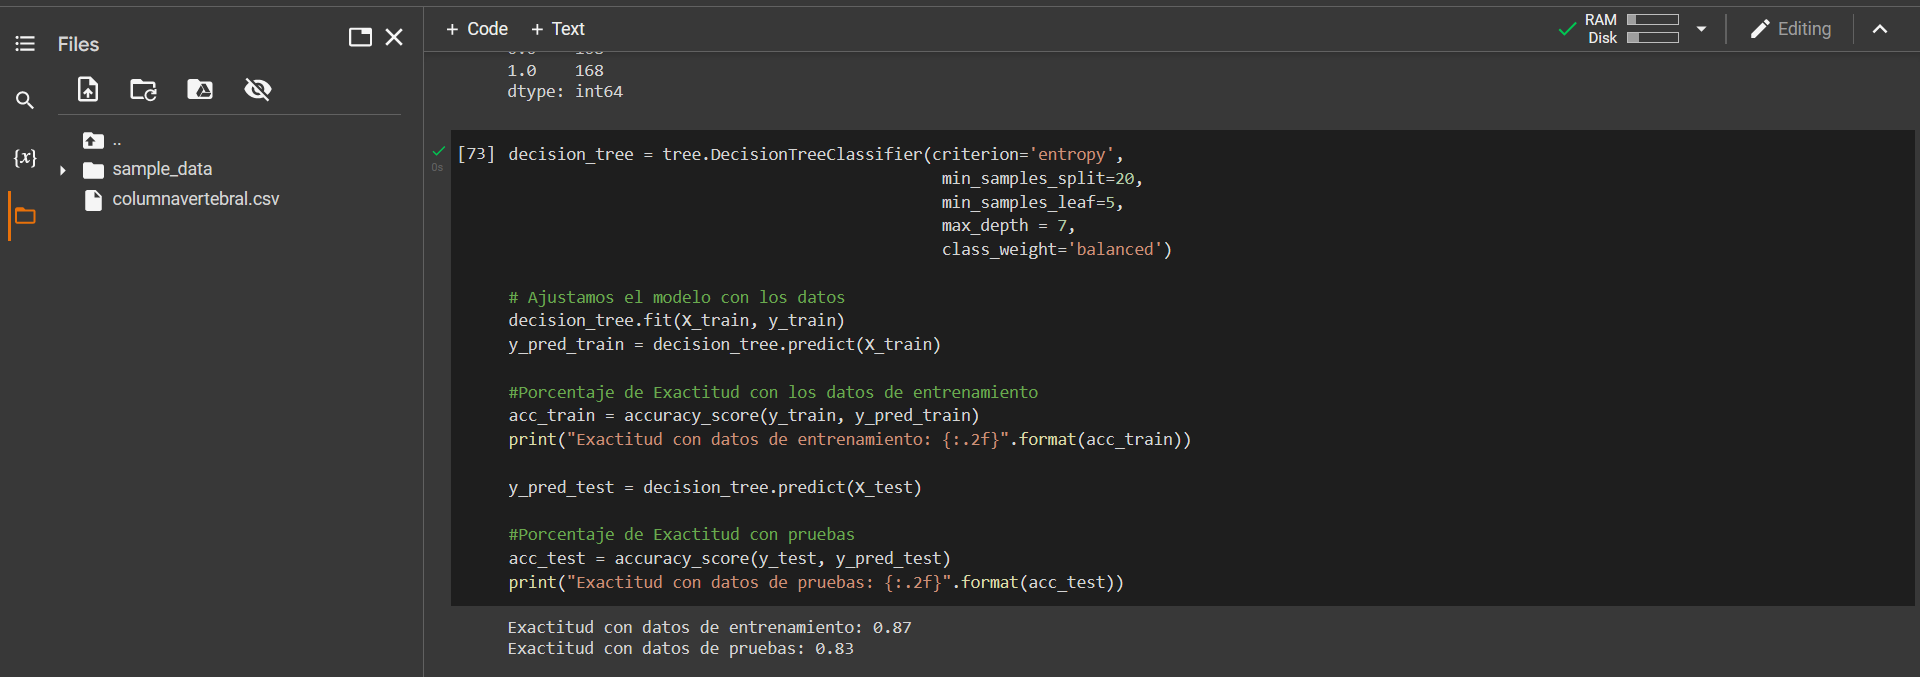

### Conclusion

Dentro de los modelos corridos anteriormente el mejor modelo es el de 3 variables, en las cuales usamos las 3 variables mas significativas arrojadas por K-best y con mayor correlacion segun las matrices de correlacion, en comparacion es un modelo con una diferencia de 0.03 en cuanto a la 'accuracy' con datos de entrenamiento y de prueba lo cual es muy bueno, se escoge por encima del modelo con solo las 2 variables mas significativas el cual tiene una diferencia de 0 porque se considera significativo el aumento de 'accuracy' en datos de entrenamiento del modelo de 3 variables y de nuevo igual tiene un resultado muy alentador en cuanto a la diferencia, por otro lado, se escoge por encima del modelo con 5 variables porque la diferencia aumenta en 0.01 y aunque la 'accuracy' sube tanto con los datos de entrenamiento como en los de prueba se considera que no es suficiente pues el aumento de variables es considerable y requiere entonces mas costos computacionales sin una ganancia significativa.

## Profundidades del arbol

In [60]:
#Luego del análisis anterior, me quedo con el conjunto de variables que deseo
df_def = df.drop(['inclinacion_pelvica','angulo_lordosis_lumbar','pendiente_sacra'], axis=1)

In [ ]:
X = df_def.drop(['tipo_paciente'], axis=1)
y = df_def['tipo_paciente']

In [ ]:
#Para usar este método X y 'y' deben ser listas np
X=np.array(X)
y=np.array(y)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1) #nsplits es el numero del kbest anterior
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced') 
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

#¿Dónde se alcanza el mejor valor de exactitud?

 Max Depth  Average Accuracy
         1          0.766667
         2          0.814286
         3          0.826190
         4          0.821429
         5          0.814286
         6          0.814286
         7          0.814286


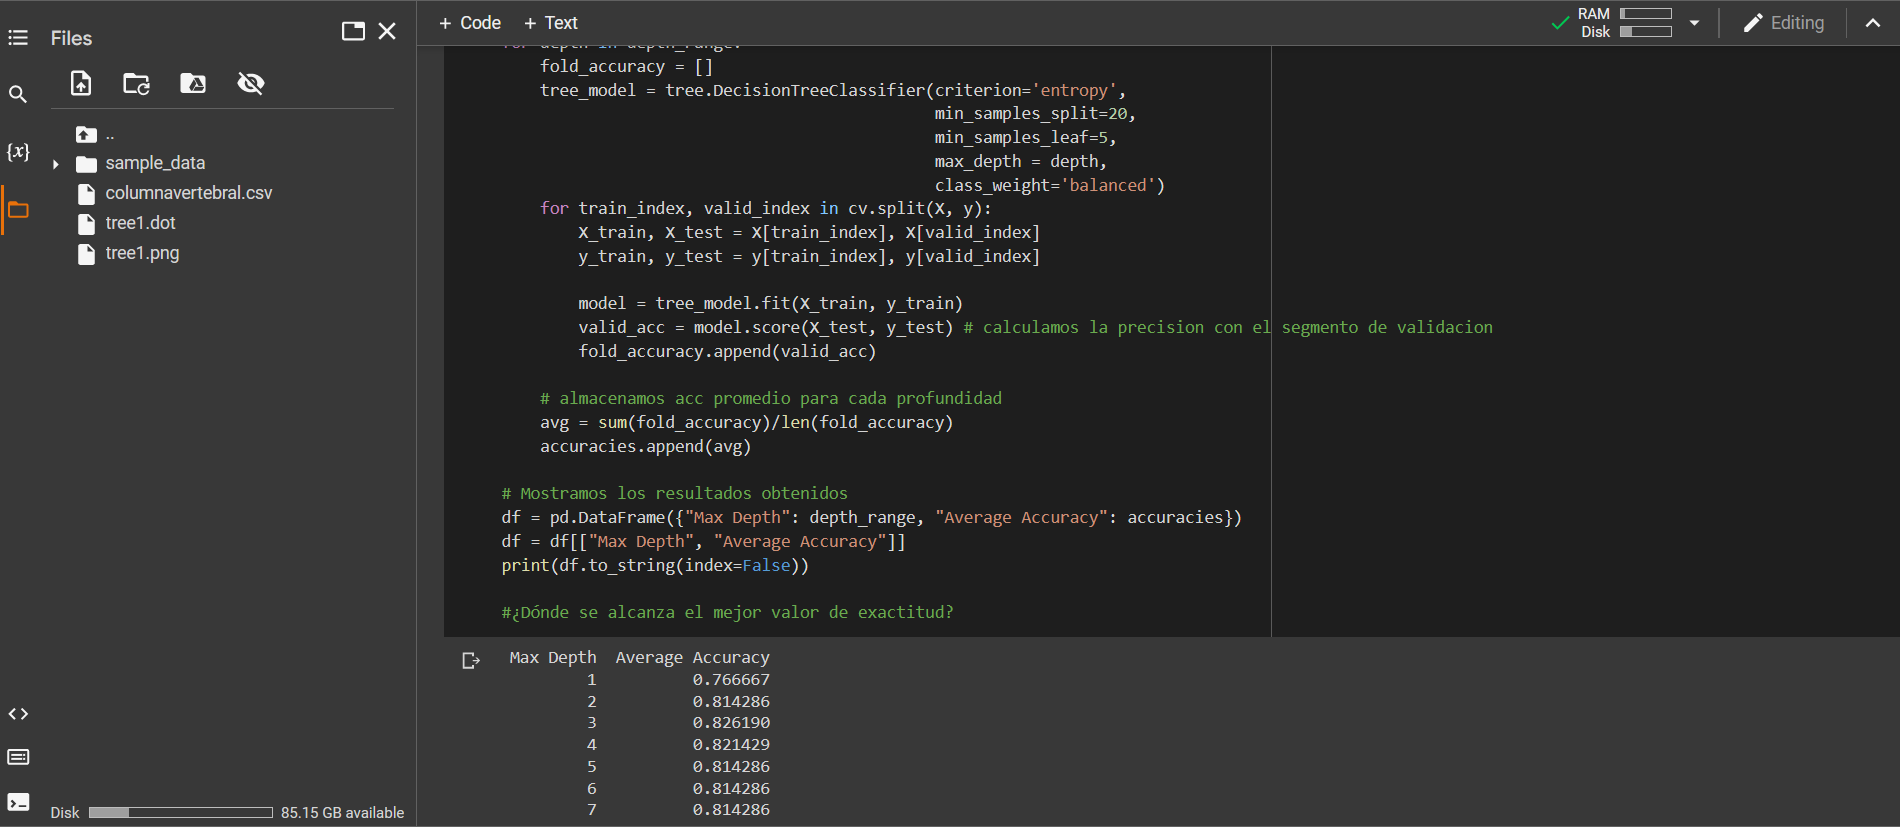

La profundidad indicada para el arbol de decisicion es de 3, pues es la que tiene mayor 'accuracy', luego de este valor comienza a disminuir la 'accuracy' y a estabilizarse.

##  Mínimo de muestras por nodo, mínimo de muestra por hoja.

In [ ]:
X = df_def.drop(['tipo_paciente'], axis=1)
y = df_def['tipo_paciente']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% prueba
                                                    stratify = y,
                                                    random_state = 1)

In [ ]:
train=[]
test=[]
test_size=[10,20,30,40,50,60,70,80,90,100]
leaf=[5,10,15,20,25,30,35,40,45,50]
for i in range(10,110,10):

  j=5

  decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=i,
                                             min_samples_leaf=j,
                                             max_depth = 3,
                                             class_weight='balanced') 

  j+=5
  # Ajustamos el modelo con los datos
  decision_tree.fit(X_train, y_train)
  y_pred_train = decision_tree.predict(X_train)

  #Porcentaje de Exactitud con los datos de entrenamiento
  acc_train = accuracy_score(y_train, y_pred_train)
  train.append(acc_train)
  #print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

  y_pred_test = decision_tree.predict(X_test)

  #Porcentaje de Exactitud con pruebas
  acc_test = accuracy_score(y_test, y_pred_test)
  test.append(acc_test)
  #print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))
  
# Mostramos los resultados obtenidos
df2 = pd.DataFrame({"Train accuracy": train, "Test Accuracy": test, "Min samples split":test_size,'Min samples leaf':leaf})
df2 = df2[["Train accuracy", "Test Accuracy",'Min samples split','Min samples leaf']]
print(df2.to_string(index=False))

 Train accuracy  Test Accuracy  Min samples split  Min samples leaf
       0.842262       0.833333                 10                 5
       0.842262       0.833333                 20                10
       0.842262       0.833333                 30                15
       0.842262       0.833333                 40                20
       0.842262       0.833333                 50                25
       0.842262       0.833333                 60                30
       0.842262       0.833333                 70                35
       0.842262       0.833333                 80                40
       0.806548       0.845238                 90                45
       0.806548       0.845238                100                50


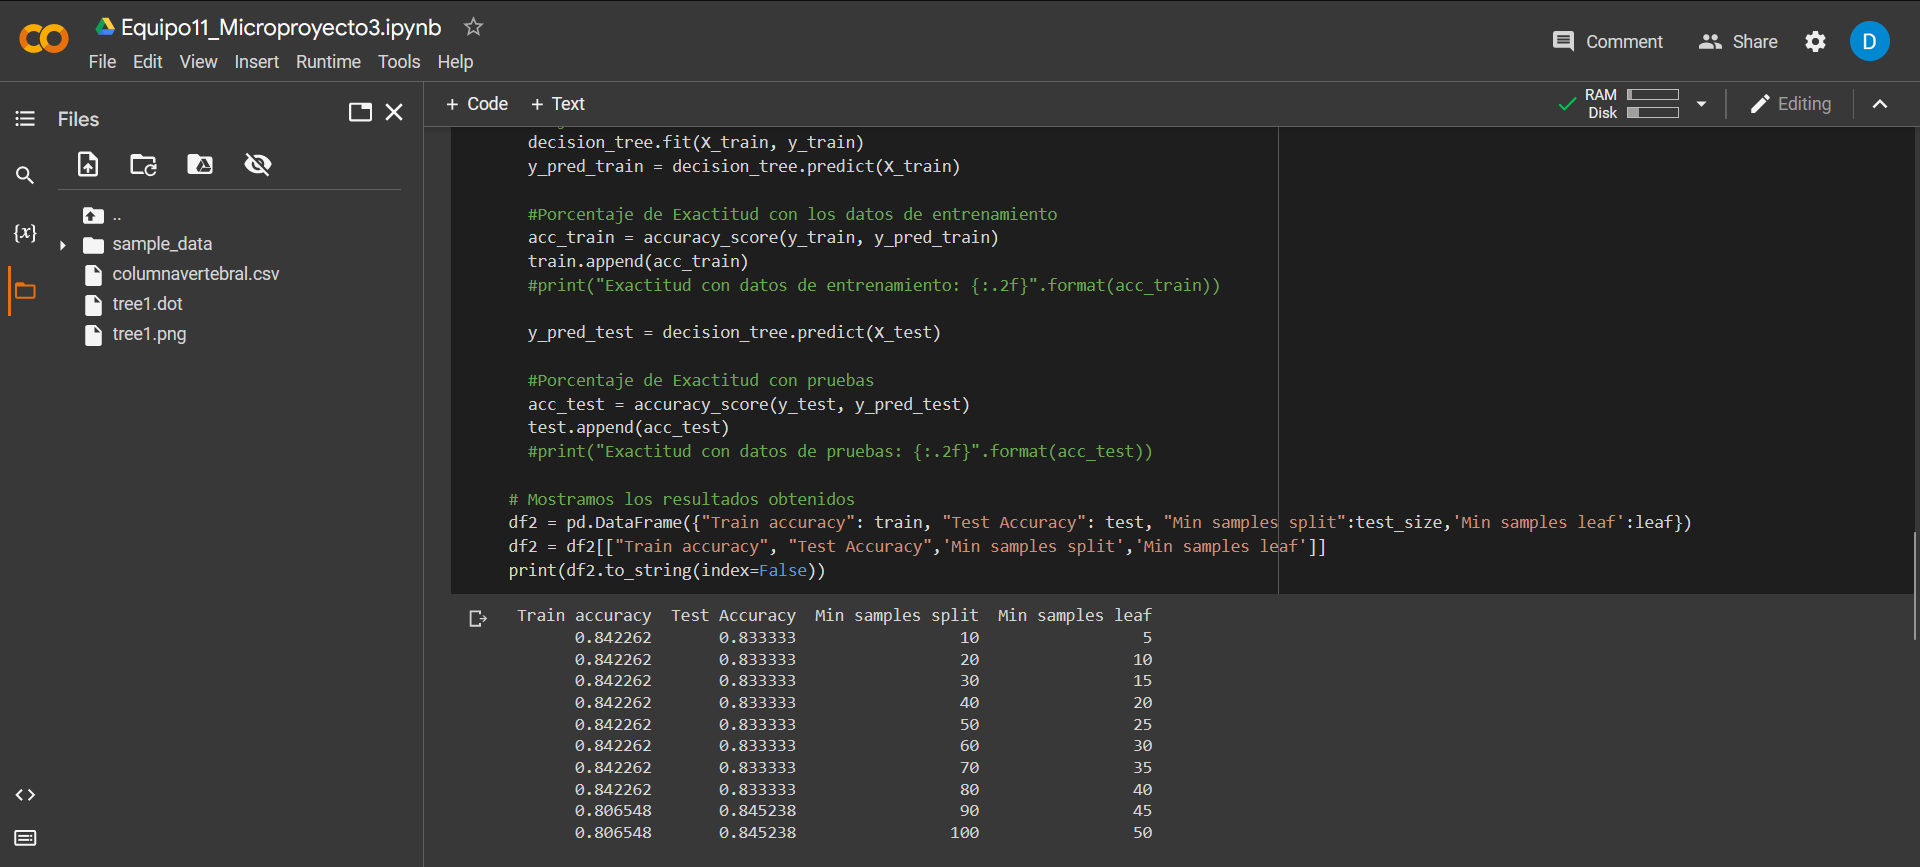

La cantidad minima de muestras para split y leaf se escogio con un criterio de mayor 'accuracy', probamos distinatas combinaciones y concluimos que la mejor es 10 muestras minimas para split y 5 para leaf, ya que la diferencia de 'accuracy' entre datos de prueba y datos de entrenamiento es muy baja e igual a las siguientes, no se eligen los valores superiores porque esta diferencia aumenta significativamente.

---
Fue necesario como se explico anteriormente balancear las clases en el dataset pues existia una diferencia significativa, se hizo mediante el metodo de Oversampling el cual genera nuevas observaciones para la clase con menor cantidad.

## Arbol de decision definitivo

In [61]:
X = df_def.drop(['tipo_paciente'], axis=1)
y = df_def['tipo_paciente']

# Dividimos los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% prueba
                                                    stratify = y,
                                                    random_state = 1)

In [82]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=10,
                                             min_samples_leaf=5,
                                             max_depth = 3,
                                             class_weight='balanced') 

# Ajustamos el modelo con los datos
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

#Porcentaje de Exactitud con los datos de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
print("Exactitud con datos de entrenamiento: {:.2f}".format(acc_train))

y_pred_test = decision_tree.predict(X_test)

#Porcentaje de Exactitud con pruebas
acc_test = accuracy_score(y_test, y_pred_test)
print("Exactitud con datos de pruebas: {:.2f}".format(acc_test))

Exactitud con datos de entrenamiento: 0.84
Exactitud con datos de pruebas: 0.83


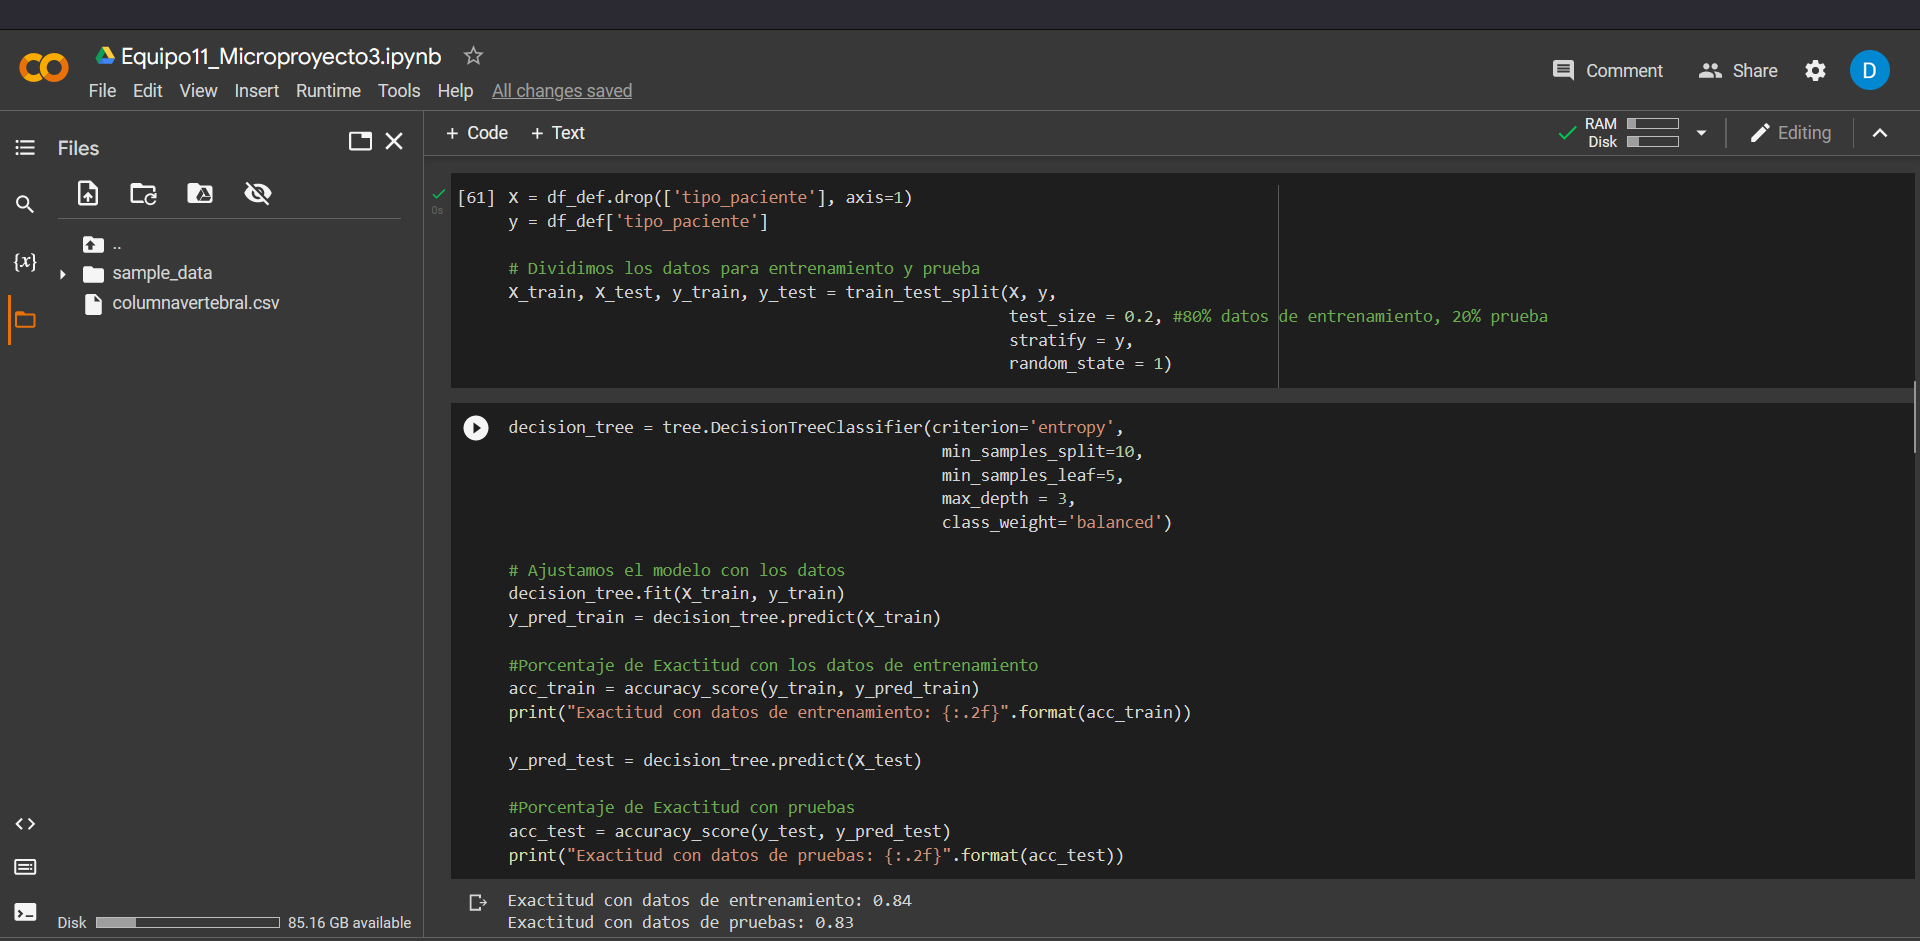

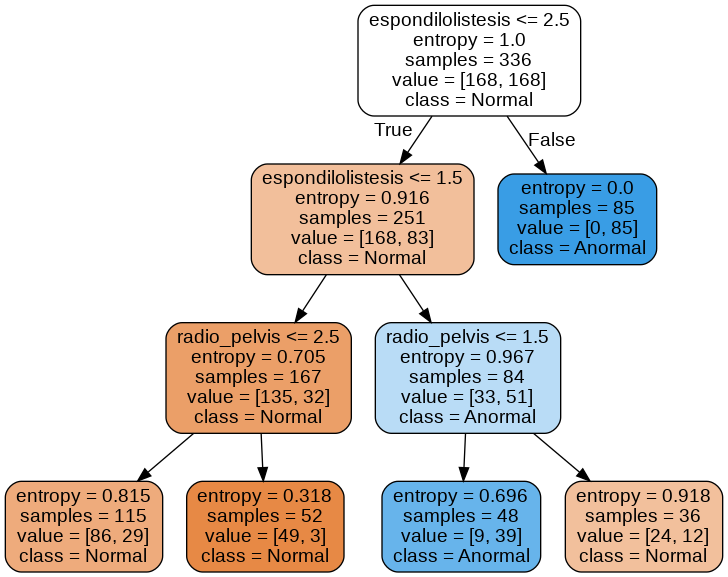

In [ ]:
# exportar el modelo a archivo .dot y graficar
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 8,
                              impurity = True,
                              feature_names = list(df_def.drop(['tipo_paciente'], axis=1)),
                              class_names = ['Normal', 'Anormal'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

Podemos observar el arbol generado con las siguientes caracteristicas definitivas:
* Con una exactidud de 84% para datos de entrenamiento y de 83% para datos de prueba
* con una profundidad de 3
* numero de variables de 3
* 20% de datos reservados para prueba y 80% para entrenamiento
* 10 como numero minimo de muestras para split y 5 para leaf
* Nodo raiz la variable espondilolistesis
* Metrica entropia

## Matriz de confusion

* tp (True positive): Valor que es verdad y que el modelo predijo correctamente.
* fn (False negative): Valor que es verdad y el modelo predijo incorrectamente.
* fp (False positive): Valor que no es verdad y que el modelo predijo incorrectamente.
* tn (True negative): Valor que no es verdad y que el modelo predijo correctamente.

### Entrenamiento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



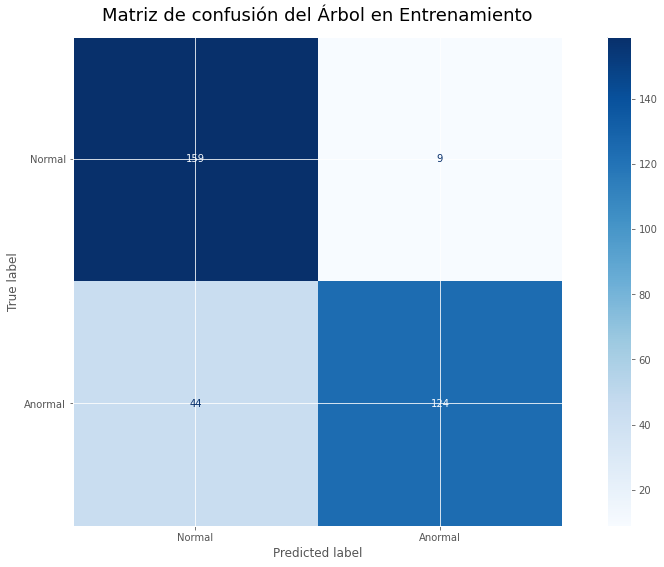

In [ ]:
disp = plot_confusion_matrix(decision_tree, X_train, y_train,
                                 display_labels=['Normal','Anormal'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Entrenamiento', y=1.02, size=18)

plt.show()

Con los datos de entrenamiento,en esta matriz podemos obsevar un resultado alentador, con tan solo 9 falsos positivos, lo cual significa que solo 9 observaciones se clasificaron como anormal siendo normales, por otro lado, tenemos un valor mas alto en cuanto a falsos negativos (44) lo cual significa que 44 observaciones eran realmente anormales pero se les clasificaron como normales, aunque es un valor mas alto, no es preocupante debido a la cantidad de datos y por esto mismo se señala con un valor mas blanco en la matriz.

### Prueba

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



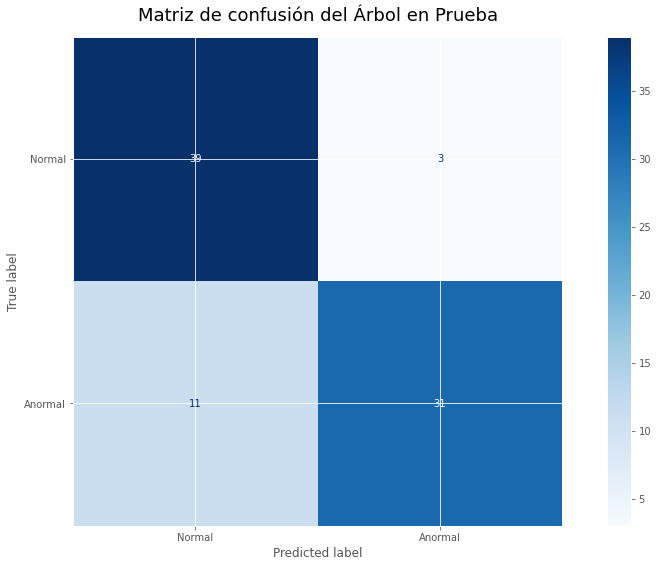

In [ ]:
disp = plot_confusion_matrix(decision_tree, X_test, y_test,
                                 display_labels=['Normal','Anormal'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Prueba', y=1.02, size=18)

plt.show()

Con los datos de prueba,en esta matriz podemos obsevar un buen resultado, con tan solo 3 falsos positivos, lo cual significa que solo 9 observaciones se clasificaron como anormal siendo normales, por otro lado, tenemos un valor mas alto en cuanto a falsos negativos (11) lo cual significa que 11 observaciones eran realmente anormales pero se les clasificaron como normales, aunque es un valor mas alto, es un poco mas preocupante que con los datos de entrenamiento pero sigue siendo un resultado aceptable, esto nos demuestra que nuestro modelo si es mas efectivo con los datos de entrenamiento que con los de prueba como lo veiniamos observando anteriormente.

## Métrica de exactitud

### Entrenamiento

In [ ]:
y_pred_train = decision_tree.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print("Train set accuracy: {:.2f}".format(acc_train))

Train set accuracy: 0.84


### Prueba

In [98]:
y_pred_test = decision_tree.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print("Test set accuracy: {:.2f}".format(acc_test))

Test set accuracy: 0.83


* Accuracy: nos mide el porcentaje de casos en los cuales el modelo ha acertado

Aqui podemos observar lo que hemos concluido en gran parte del trabajo y es que el modelo tiene mas 'accuracy' con los datos de entrenamiento, pero en especial que la diferencia con los datos de prueba es muy baja (0.01) lo cual es ideal para nuestros resultados, mostrando que no existen problemas significativos con overfitting o underfitting.

## F1-Score.

### Entrenamiento

In [ ]:
decoded_y_test = y_train
decoded_predictions = decision_tree.predict(X_train)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86       168
         1.0       0.93      0.74      0.82       168

    accuracy                           0.84       336
   macro avg       0.86      0.84      0.84       336
weighted avg       0.86      0.84      0.84       336



* Recall: nos indica que porcentaje de pacientes de tipo normal somos capaces de identificar, para el tipo de paciente normal podemos identificar un 95%, para los de tipo anormal podemos identificar un 74%

* Precision: Nos indica que porcentaje de los pacientes que analicemos seran efectivamente de la clase supuesta, en el caso de los de tipo normal sera del 78% y del tipo anormal del 93%

* F1-Score: nos combina la medida de Recall con el 'accuracy' que hemos utilizado en el resto del trabajo, asumiendo que nos importan de igual manera para nuestro analisis, para el caso de los pacientes del tipo normal tenemos un F1-Score del 86% y para pacientes del tipo anormal un valor del 82%



### Prueba

In [ ]:
decoded_y_test = y_test
decoded_predictions = decision_tree.predict(X_test)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        42
         1.0       0.91      0.74      0.82        42

    accuracy                           0.83        84
   macro avg       0.85      0.83      0.83        84
weighted avg       0.85      0.83      0.83        84



* Recall: nos indica que porcentaje de pacientes de tipo normal somos capaces de identificar, para el tipo de paciente normal podemos identificar un 93%, para los de tipo anormal podemos identificar un 74%

* Precision: Nos indica que porcentaje de los pacientes que analicemos seran efectivamente de la clase supuesta, en el caso de los de tipo normal sera del 78% y del tipo anormal del 91%

* F1-Score: nos combina la medida de Recall con el 'accuracy' que hemos utilizado en el resto del trabajo, asumiendo que nos importan de igual manera para nuestro analisis, para el caso de los pacientes del tipo normal tenemos un F1-Score del 85% y para pacientes del tipo anormal un valor del 82%



En conclusion, podemos observar que el modelo se comporta mejor con los datos de entrenamiento y en general con los pacientes de tipo normal, debido a que tiene un recall mas favorable, esto nos confirma lo visto en la matriz donde teniamos mas valores que eran falsos negativos


##  Clasificación bayesiana.

In [64]:
#Ajustando el modelo
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train,
    y_train
)
y_pred = gnb.predict(X_test)
 
print('Accuracy in training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy in test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))


Accuracy in training set: 0.80
Accuracy in test set: 0.88


* Accuracy: nos mide el porcentaje de casos en los cuales el modelo ha acertado.

Para el caso de la clasificacion bayesiana tenemos una 'accuracy' mas alta para los datos de prueba que para los de entrenamiento, con una diferencia de 0.08, lo cual aun es aceptable porque esta debajo del 0.1, se prefiere el modelo de arboles de decision sobre este pueste que el aumento de 'accuracy' no se considera tan significativo en los datos de prueba (un 4%) vs la perdida de exactitud con los datos de entreneamiento.

### Matriz de confusión.

#### Entrenamiento.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



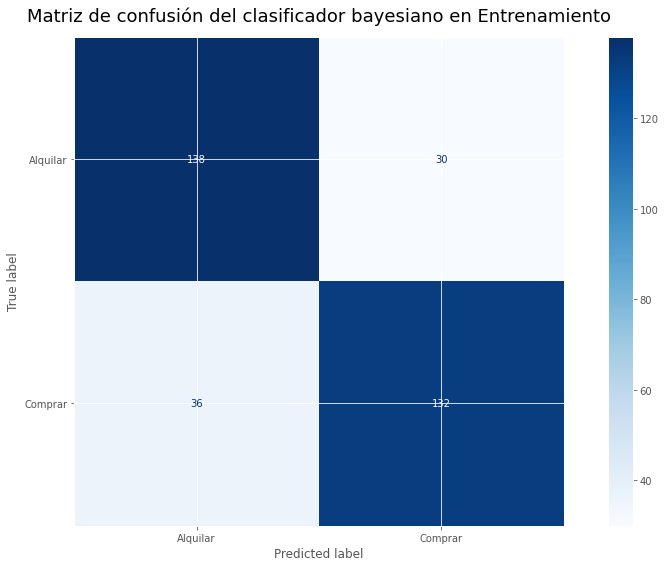

In [ ]:
disp = plot_confusion_matrix(gnb, X_train, y_train,
                                 display_labels=['Alquilar','Comprar'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del clasificador bayesiano en Entrenamiento', y=1.02, size=18)

plt.show()

Con los datos de entrenamiento,en esta matriz podemos obsevar un resultado no tan alentador, con 30 falsos positivos, lo cual significa que 30 observaciones se clasificaron como anormal siendo normales, por otro lado, tenemos un valor mas alto en cuanto a falsos negativos (36) lo cual significa que 36 observaciones eran realmente anormales pero se les clasificaron como normales.

En comparacion con el modelo de arbol de decision, se prefiere el primero, puesto que la disminucion de falsos negativos no es tan alta como para compensar el gran aumneto de falsos positivos.

#### Prueba

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



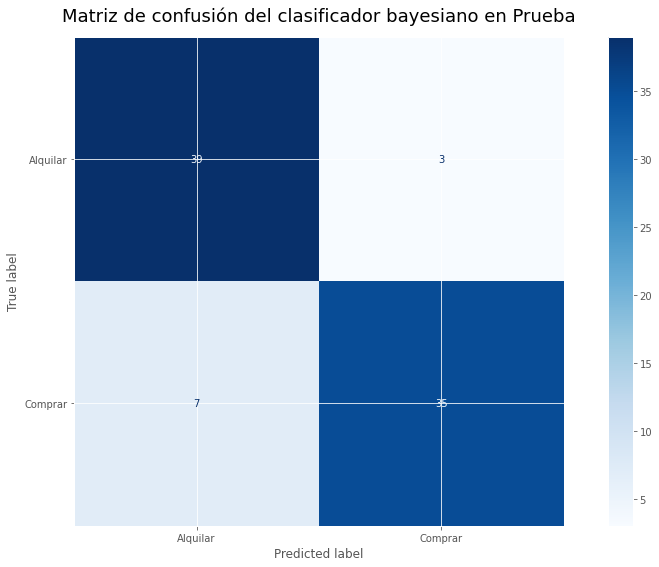

In [ ]:
disp = plot_confusion_matrix(gnb, X_test, y_test,
                                 display_labels=['Alquilar','Comprar'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del clasificador bayesiano en Prueba', y=1.02, size=18)

plt.show()

Con los datos de prueba,en esta matriz podemos obsevar un resultado mas alentador, con 3 falsos positivos, lo cual significa que 3 observaciones se clasificaron como anormal siendo normales, por otro lado, tenemos un valor mas alto en cuanto a falsos negativos (7) lo cual significa que 7 observaciones eran realmente anormales pero se les clasificaron como normales.

En comparacion con el modelo de arbol de decision, se prefiere el modelo de arbol de decision, puesto en cuanto a los falsos positivos el valor es el mismo, pero en cuanto a los falsos negativos la disminucion no es tan significativa como para preferirle teniendo conocimiento de esta misma matriz en los datos de entrenamiento

### F1-Score

#### Entrenamiento

In [ ]:
decoded_y_test = y_train
decoded_predictions = gnb.predict(X_train)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       168
         1.0       0.81      0.79      0.80       168

    accuracy                           0.80       336
   macro avg       0.80      0.80      0.80       336
weighted avg       0.80      0.80      0.80       336



* Recall: nos indica que porcentaje de pacientes de tipo normal somos capaces de identificar, para el tipo de paciente normal podemos identificar un 82%, para los de tipo anormal podemos identificar un 79%

* Precision: Nos indica que porcentaje de los pacientes que analicemos seran efectivamente de la clase supuesta, en el caso de los de tipo normal sera del 79% y del tipo anormal del 81%

* F1-Score: nos combina la medida de Recall con el 'accuracy' que hemos utilizado en el resto del trabajo, asumiendo que nos importan de igual manera para nuestro analisis, para el caso de los pacientes del tipo normal tenemos un F1-Score del 81% y para pacientes del tipo anormal un valor del 80%

En este caso el modelo de arbol de decision se muestra muy superior al modelo de clasificacion bayesiana, por lo tanto siendo preferido en este analisis.

#### Prueba

In [ ]:
decoded_y_test = y_test
decoded_predictions = gnb.predict(X_test)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        42
         1.0       0.92      0.83      0.88        42

    accuracy                           0.88        84
   macro avg       0.88      0.88      0.88        84
weighted avg       0.88      0.88      0.88        84



* Recall: nos indica que porcentaje de pacientes de tipo normal somos capaces de identificar, para el tipo de paciente normal podemos identificar un 93%, para los de tipo anormal podemos identificar un 83%

* Precision: Nos indica que porcentaje de los pacientes que analicemos seran efectivamente de la clase supuesta, en el caso de los de tipo normal sera del 85% y del tipo anormal del 92%

* F1-Score: nos combina la medida de Recall con el 'accuracy' que hemos utilizado en el resto del trabajo, asumiendo que nos importan de igual manera para nuestro analisis, para el caso de los pacientes del tipo normal tenemos un F1-Score del 89% y para pacientes del tipo anormal un valor del 88%

Podemos observar que con los datos de prueba existe un aumento en el recall del tipo anormal, pero ademas de esto el modelo de arbol de decicison es superior.

En conclusion el modelo de clasificacion bayesiana es un modelo que se comporta bien con los datos de prueba pero existe una diferencia muy grande de 'accuracy' con los datos de entrenamiento, por lo cual no se considera un modelo tan bueno, ademas en los analisis de metricas como el F1-Score, el recall y la precision no tiene tan buen desempeño como el modelo de arbol de decision. 

## Analisis de resultados

### Clasificacion bayesiana

In [90]:
#¿Qué tan seguro es la predicción del clasificador?
x_test=pd.DataFrame(columns=('Incidencia_pelvica','radio_pelvis','espondilolistesis','tipo_paciente'))
x_test.loc[0]=(0,0,3,0)    #El primer dato es de comprar y no importa, ya que ese valor es el que se va a predecir
y_pred = gnb.predict(x_test.drop(['tipo_paciente'], axis = 1)) #Saca 'comprar':  Característica obj
y_pred=int(y_pred)
print("Prediccion: " + str(y_pred))
y_proba = gnb.predict_proba(x_test.drop(['tipo_paciente'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2)) + "%")     

Prediccion: 1
Probabilidad de Acierto: 97.97%


In [96]:
#¿Qué tan seguro es la predicción del clasificador?
x_test=pd.DataFrame(columns=('Incidencia_pelvica','radio_pelvis','espondilolistesis','tipo_paciente'))
x_test.loc[0]=(1,1,2,0)    #El primer dato es de comprar y no importa, ya que ese valor es el que se va a predecir
y_pred = gnb.predict(x_test.drop(['tipo_paciente'], axis = 1)) #Saca 'comprar':  Característica obj
y_pred=int(y_pred)
print("Prediccion: " + str(y_pred))
y_proba = gnb.predict_proba(x_test.drop(['tipo_paciente'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2)) + "%")     

Prediccion: 1
Probabilidad de Acierto: 69.83%


### Arbol de decision

In [91]:
#¿Qué tan seguro es la predicción del clasificador?
x_test=pd.DataFrame(columns=('Incidencia_pelvica','radio_pelvis','espondilolistesis','tipo_paciente'))
x_test.loc[0]=(0,0,3,0)    #El primer dato es de comprar y no importa, ya que ese valor es el que se va a predecir
y_pred = decision_tree.predict(x_test.drop(['tipo_paciente'], axis = 1)) #Saca 'comprar':  Característica obj
y_pred=int(y_pred)
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['tipo_paciente'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2)) + "%") 

Prediccion: 1
Probabilidad de Acierto: 100.0%


In [97]:
#¿Qué tan seguro es la predicción del clasificador?
x_test=pd.DataFrame(columns=('Incidencia_pelvica','radio_pelvis','espondilolistesis','tipo_paciente'))
x_test.loc[0]=(1,1,2,0)    #El primer dato es de comprar y no importa, ya que ese valor es el que se va a predecir
y_pred = decision_tree.predict(x_test.drop(['tipo_paciente'], axis = 1)) #Saca 'comprar':  Característica obj
y_pred=int(y_pred)
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['tipo_paciente'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2)) + "%") 

Prediccion: 1
Probabilidad de Acierto: 81.25%


Podemos ver que ambos modelos se comprotan de manera adecuada con una observacion obvia, la cual es un alto grado de espondilolistesis, la cual es una afeccion medica, ademas tiene niveles bastante bajos en las otras variables, es obvio que con estas condiciones el paciente sera de tipo anormal, aunque es de destacar que el arbol de decision lo hace con una 'accuracy' del 100% vs 97.97% de ka clasificacion bayesiana.

Por otro lado, con una observacion mas comun como lo seria la segunda, donde se tiene cierto grado de espondilolistesis y unos grados mucho ams comunes del resto de variables, el modelo de clasificacion bayesiana tiene una 'accuracy' del 69.83% vs un 81.25% del arbol de decision, lo cual es suficientemente significativo como para preferirlo.

Como se ha venido concluyendo en todos los analisis de metricas y matrices de confusion, el modelo de arbol de decision es superior al modelo de clasificacion bayesiana.

## Conclusiones

* El modelo de arbol de decision es superior al modelo de clasificacion bayesiano para este caso en particular, obteniendo mejor desempeño en observaciones con clasificacion obvia y no tan obvia.

* La base de datos tenia tipos de variables incorrectos por lo cual fue necesario cambiarlos para poder efectuar los modelos

* La base de datos tenia observaciones que no eran adecuadas para lo que significaban las variables, aunque se tuvo un grado de tolerancia alto debido a que su razon es clasificar pacientes de tipo anormal, lo cual hace razonable que sus valores no esten dentro de los rangos comunes.

* Fue necesario balancear las clases mediante un oversampling con SMOTE para que los modelos fueran adecuados y tuvieran mejores predicciones.

* Se realizo una agrupacion por cuartiles en las variables para tener un manejo mas sencillo a la hora de realizar los modelos, ya que la mayoria tenia rangos del 0 al 100 y quedaron todas con rangos del 0 al 3

* La espondilolistesis al ser una afeccion medica era muy predominante que a mayores valores de esta la persona fuera del tipo anormal, esto lo vimos claramente en las graficas de barras por cada variable.

* Por la conclusion anterior, era intuitivo pensar que la espondilolistesis seria el nodo raiz, lo cual se comprobo con disitintos metodos.

* El porcentaje indicado para datos de prueba fue del 20%, luego de observar como la 'accuracy' para el conjunto de datos de entrenamiento no cambiaba significativamente pero para la porcion de datos de prueba si.

* El numero de variables para el modelo fue dificil de elegir pero se priorizo una diferencia baja entre 'accuracy' para los datos de prueba y para los datos de entrenamiento, sin descuidar los valores independientes de los mismos.

* Luego de iterar por varios valores para el minimo de meustras para split y para leaf se decidio que el menor era el mejor porque le daba mas libertad al arbol ya demas potenciaba la 'accuracy'

* El Arbol de decision final nos dio una 'accuracy' y unas metricas buenas, aunque no eran excelentes y se podrian mejorar posiblemente teniendo clases balanceadas de forma natural y no artificial como se hizo en este analisis.

* El metodo de clasificacion bayesiana no daba resultados tan desalentadores como se esperaba, aunque si era peor que el arbol de decision, tal metodo no se deberia descartar en futuros analisis


## Referencias


Sola, R. G. de. (2021, 18 octubre). Balance Sagital: una introducción teórica. Unidad de Neurocirugía. https://neurorgs.net/docencia/sesiones-residentes/balance-sagital-una-introduccion-teorica/

Le Huec JC, Aunoble S, Philippe L, Nicolas P. Pelvic parameters: origin and significance. Eur Spine J. 2011 Sep;20 Suppl 5(Suppl 5):564-71. doi: 10.1007/s00586-011-1940-1. Epub 2011 Aug 10. PMID: 21830079; PMCID: PMC3175921.